  <h1 style="color: #00E676;">Cars 4 You - Machine Learning Projects</h1>

Group: 39
- **Name**: Afonso Pereira **number**: 20250342
- **Name**: Daniel Ribeiro, **number**: 20250376
- **Name**: Pedro Rei, **number**: 20250389
- **Name**: Tomás Boavista, **number**: 20250496

  <h1 style="color: #00E676;">Group member contirbution</h1>

<h1 style="color: #00E676;">Abstract</h1> 

This project addresses the challenge of accurately predicting **vehicle prices** for **Cars 4 You**, an online car resale platform facing operational scalability issues due to increasing demand and delays associated with manual vehicle inspections. To support a faster and more scalable pricing process, this work investigates whether machine learning regression models can reliably estimate vehicle prices using only information available at the time of customer registration, prior to any physical inspection. A comprehensive **regression benchmarking framework** was implemented using a consistent **5-fold cross-validation** strategy to ensure fair, robust, and leak-free model evaluation. Several regression algorithms covered in the course were assessed, including **Linear Regression**, **Decision Trees**, **Random Forests**, **K-Nearest Neighbors**, and **Neural Networks**. All preprocessing steps—such as missing value imputation, categorical encoding, and feature engineering—were applied exclusively within the cross-validation procedure to prevent data leakage and ensure realistic performance estimation. Results indicate that ensemble-based methods, particularly **Random Forest models**, outperform simpler linear and single-tree approaches in terms of predictive accuracy. A baseline **Random Forest model** using default **hyperparameters** already achieved strong performance, while moderate **hyperparameter tuning**, including an increase in the number of trees, led to small but consistent improvements in cross-validated mean absolute error. **Feature engineering** contributed modest yet stable gains across multiple models, suggesting that the derived variables capture additional information beyond the original feature set. Overall, the findings demonstrate that machine learning models—especially optimized ensemble methods—can provide accurate and robust vehicle price predictions. These results support the feasibility of deploying a data-driven pricing tool to reduce reliance on manual inspections, improve operational efficiency, and enhance the customer experience at Cars 4 You.

<h1 style="color: #00E676;">1. Identifying Business Needs</h1>

This project is framed within the context of **Cars 4 You**, a fictional online car resale company operating in the automotive sales market. The company follows a two-stage vehicle evaluation process: sellers initially submit vehicle specifications through the platform, followed by a physical inspection conducted by a mechanical team before final pricing.
While this process ensures accurate assessments, it has become a bottleneck as demand has increased, leading to longer waiting times for inspections and potential customer dissatisfaction. As a result, **Cars 4 You** seeks to understand whether data-driven models can assist in estimating vehicle prices earlier in the process.

The central business question addressed in this project is whether machine learning techniques can accurately predict vehicle prices using only user-provided specifications, thereby reducing dependence on manual inspections for initial price estimation. This problem is formulated as a supervised regression task, where the objective is to predict a continuous target variable (**vehicle price**) from structured vehicle attributes.
To address this question, the project is structured around three main objectives: (i) benchmarking multiple regression models using a robust cross-validation framework, (ii) optimizing the most promising model through hyperparameter tuning and (iii) extracting additional insights through exploratory analyses that go beyond standard model comparison. 
 
To ensure reliable and fair model comparison, all models in this project are evaluated exclusively using a **5-fold cross-validation strategy**. In this approach, the dataset is split into five disjoint folds, with each fold being used once as a validation set while the remaining folds are used for training. All preprocessing steps and model fitting are performed independently within each training fold, which prevents information leakage and provides a robust estimate of generalization performance.

<h1 style="color: #00E676;">2. Data Exploration and Preprocessing</h1>

This section focuses on **exploring the dataset** and preparing it for subsequent modeling stages. We begin by analyzing the structure, distributions, and key characteristics of the available variables in order to identify patterns, potential data quality issues, and relationships relevant to vehicle price prediction. Based on the insights obtained during exploration, a set of **data cleaning and preprocessing steps** is defined to ensure that the data is consistent, informative, and suitable for use in **machine learning regression models**.

  <h2 style="color: #00E676;">Imported Libraries</h2>

In [1]:
#!pip install rapidfuzz

In [ ]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown
import re
import unicodedata

# Visualization utilities
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm

# To clean data with text similarity
from rapidfuzz import process, fuzz

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Model assessment
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

All libraries required for data exploration, preprocessing, model training, and evaluation were imported at the beginning of the notebook. The project relies exclusively on scikit-learn for machine learning modeling and evaluation, in accordance with the project guidelines.

The project relies exclusively on **scikit-learn**, in accordance with the project guidelines, and includes:
- Libraries for **data manipulation** and **visualization** (NumPy, Pandas, Matplotlib, Seaborn);
- Preprocessing tools for handling missing values, scaling numerical variables and encoding categorical features;
- Model assessment utilities to implement a **Cross-Validation-based evaluation strategy**, which is used consistently throughout the project;
- A set of **regression algorithms** covered in class (Linear Regression, KNN, Decision Trees, Random Forests, SVR and MLP), enabling a fair benchmarking process.

  <h2 style="color: #00E676;">Import Datasets</h2>

In [3]:
df_train = pd.read_csv("data/train.csv")
print(f"The dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns")

The dataset has 75973 rows and 14 columns


In [4]:
df_test = pd.read_csv("data/test.csv")
print(f"The dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns")

The dataset has 32567 rows and 13 columns


<table style="width:100%; font-size:12px; border-collapse: collapse;">
  <thead>
    <tr style="background-color:#f2f2f2; text-align:left;">
      <th style="border:1px solid #ddd;">Variable</th>
      <th style="border:1px solid #ddd;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr><td style="border:1px solid #ddd;">carID </td><td style="border:1px solid #ddd;">An attribute that contains an identifier for each car</td></tr>
    <tr><td style="border:1px solid #ddd;">Brand</td><td style="border:1px solid #ddd;">The car’s main brand (e.g. Ford, Toyota)</td></tr>
    <tr><td style="border:1px solid #ddd;">model</td><td style="border:1px solid #ddd;">The car model</td></tr>
    <tr><td style="border:1px solid #ddd;">year</td><td style="border:1px solid #ddd;">The year of Registration of the Car</td></tr>
    <tr><td style="border:1px solid #ddd;">mileage</td><td style="border:1px solid #ddd;">The total reported distance travelled by the car (in miles)</td></tr>
    <tr><td style="border:1px solid #ddd;">tax</td><td style="border:1px solid #ddd;">The amount of road tax (in £) that, in 2020, was
applicable to the car in question.</td></tr>
    <tr><td style="border:1px solid #ddd;">fuelType</td><td style="border:1px solid #ddd;">Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric)</td></tr>
    <tr><td style="border:1px solid #ddd;">mpg</td><td style="border:1px solid #ddd;">Average Miles per Gallon</td></tr>
    <tr><td style="border:1px solid #ddd;">engineSize</td><td style="border:1px solid #ddd;">Size of Engine in liters (Cubic Decimeters)</td></tr>
    <tr><td style="border:1px solid #ddd;">paintQuality%</td><td style="border:1px solid #ddd;">The mechanic’s assessment of the cars’ overall paint
quality and hull integrity (filled by the mechanic during evaluation).</td></tr>
    <tr><td style="border:1px solid #ddd;">previousOwners</td><td style="border:1px solid #ddd;">Number of previous registered owners of the vehicle.</td></tr>
    <tr><td style="border:1px solid #ddd;">hasDamage</td><td style="border:1px solid #ddd;">Boolean marker filled by the seller at the time of
registration stating whether the car is damaged or not.</td></tr>
    <tr><td style="border:1px solid #ddd;">price</td><td style="border:1px solid #ddd;">The car’s price when purchased by Cars 4 You (in £).</td></tr>
  </tbody>
</table>

The datasets provided by **Cars 4 You** were loaded separately into training and test sets.  
The training dataset contains 75,973 observations and includes the target variable `price`, while the test dataset contains 32,567 observations and does not include the target, as expected in the Kaggle evaluation setup.

At this stage, no preprocessing or transformations were applied. The goal of this step is solely to confirm data integrity and dimensionality before proceeding to data exploration and cleaning.
It is important to note that some variables require special consideration with respect to the project’s business objective. In particular, `paintQuality%` is assessed by a mechanic during inspection and is therefore not available at prediction time, when the user submits the car information online. For this reason, this variable is not used in the final predictive models, ensuring consistency with the intended deployment scenario. Additionally, `carID` is a unique identifier and does not carry predictive information, and is therefore excluded from the modeling process.
 
This initial inspection establishes which variables are suitable for modeling and defines the scope of the exploratory analysis conducted in the following steps.

  <h2 style="color: #00E676;">2.1. Initial Data Inspection</h2>

In [5]:
df_train.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [6]:
df_test.head()

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


An initial inspection of both the training and test datasets was performed to understand their structure, variable types and potential data quality issues.

By examining the first observations of each dataset, allowed for an early identification of potentially inconsistent or unrealistic values, such as negative mileage, non-integer values for the registration year, and invalid entries in categorical variables, which are addressed in subsequent preprocessing steps.

The dataset information summary highlights a mix of numerical and categorical variables, as well as the presence of missing values across several features. 

In [8]:
pct_missing = (df_train.isna().mean() * 100).round(2)
pct_missing_str = pct_missing.map(lambda x: f"{x:.2f}%")
pct_missing_str

carID              0.00%
Brand              2.00%
model              2.00%
year               1.96%
price              0.00%
transmission       2.00%
mileage            1.93%
fuelType           1.99%
tax               10.40%
mpg               10.43%
engineSize         2.00%
paintQuality%      2.01%
previousOwners     2.04%
hasDamage          2.04%
dtype: object

The results show that most variables contain a small proportion of missing values (around 2%), while `tax` and `mpg` present a **higher missing rate** (approximately 10%). These differences motivate the use of feature-specific imputation strategies, which are defined later in the preprocessing stage and applied exclusively within the training folds during Cross-Validation.

In [9]:
df_train.duplicated().sum()

np.int64(0)

In [10]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
carID,75973.0,37986.000000,21931.660338,0.000000,18993.00,37986.0,56979.0,75972.000000
year,74482.0,2017.096611,2.208704,1970.000000,2016.00,2017.0,2019.0,2024.121759
price,75973.0,16881.889553,9736.926322,450.000000,10200.00,14699.0,20950.0,159999.000000
mileage,74510.0,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.000000
tax,68069.0,120.329078,65.521176,-91.121630,125.00,145.0,145.0,580.000000
mpg,68047.0,55.152666,16.497837,-43.421768,46.30,54.3,62.8,470.800000
engineSize,74457.0,1.660136,0.573462,-0.103493,1.20,1.6,2.0,6.600000
paintQuality%,74449.0,64.590667,21.021065,1.638913,47.00,65.0,82.0,125.594308
previousOwners,74423.0,1.994580,1.472981,-2.345650,1.00,2.0,3.0,6.258371
hasDamage,74425.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000


After the initial data inspection, we verified that there are **no duplicate rows** in the training dataset. Additionally, we confirmed the data types of all variables and identified the categorical features that will require appropriate encoding in later stages of the pipeline.

Based on the statistical summary of the numerical variables, several inconsistencies were identified. In the `year` column, values exceeding 2020 (the reference year of the dataset) were observed, as well as unusually low values relative to the interquartile range, indicating the presence of potential outliers.

Additionally, several numerical variables exhibit values that are inconsistent with their real-world interpretation. Clear impossibilities are observed for variables such as `mileage`, `tax`, `mpg`, and `engineSize`, which present negative values. In the case of `previousOwners`, non-integer and negative values are identified, indicating data recording issues rather than meaningful numerical variation. These observations motivate the application of targeted data cleaning strategies in the preprocessing stage.


Finally, the `hasDamage` variable shows no variability in the available data, taking only a single observed value or missing entries. This lack of variability is noted at this stage and is taken into account in subsequent feature selection decisions.


 <h3 style="color: #00E676;">2.1.1. Negative and Null Observations</h3>

In [11]:
col = {
    "mileage < 0":         df_train["mileage"] < 0,
    "mpg < 0":             df_train["mpg"] < 0,
    "tax < 0":             df_train["tax"] < 0,
    "previousOwners < 0":  df_train["previousOwners"] < 0,
    "engineSize < 0":      df_train["engineSize"] < 0,
}

for label, mask in col.items():
    col = label.split()[0]
    display(Markdown(f"The number of observations that are negative in **`{col}`** is **{int(mask.sum())}**."))

The number of observations that are negative in **`mileage`** is **369**.

The number of observations that are negative in **`mpg`** is **36**.

The number of observations that are negative in **`tax`** is **378**.

The number of observations that are negative in **`previousOwners`** is **371**.

The number of observations that are negative in **`engineSize`** is **84**.

 <h4 style="color: #00E676;">Mileage</h4>

In [12]:
df_train.loc[df_train["mileage"] < 0].sort_values("mileage")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
843,7845,BMW,3 Series,2019.0,23498,Semi-Auto,-58540.574478,Diesel,145.0,54.3,2.0,38.0,NaN,0.0
1580,9246,BMW,2 Series,2019.0,24450,Manual,-58540.574478,Diesel,145.0,60.1,2.0,78.0,4.0,0.0
8673,13710,BMW,M3,2004.0,17850,Manual,-58540.574478,Petrol,325.0,23.3,3.2,68.0,1.0,0.0
11088,11313,BMW,X3,2015.0,12250,Automatic,-58540.574478,Diesel,NaN,54.3,2.0,43.0,3.0,0.0
12607,9058,BMW,2 Series,2019.0,23450,Semi-Auto,-58540.574478,Petrol,150.0,48.7,1.5,93.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57208,34401,Hyundai,I10,2019.0,8590,Manual,-36635.042697,Petrol,150.0,60.1,1.0,42.0,2.0,0.0
54200,33436,Hyundai,Tucson,2019.0,21490,Manual,-36635.042697,Petrol,145.0,34.9,1.6,56.0,3.0,0.0
16311,31434,Hyundai,I20,2018.0,8980,Manual,-36635.042697,Petrol,145.0,55.4,1.2,61.0,3.0,0.0
20141,34786,Hyundai,I800,2019.0,18490,Manual,-36635.042697,diesel,150.0,31.7,2.5,39.0,2.0,0.0


In [13]:
df_train.loc[df_train["mileage"] < 0, "mileage"].mean()

np.float64(-47040.576642624925)

In [14]:
df_train.loc[df_train["mileage"] > 0, "mileage"].sort_values()

70608         1.0
30601         1.0
37684         1.0
15119         1.0
72152         1.0
           ...   
33484    241565.0
45843    250650.0
55413    259000.0
4840     300000.0
6658     323000.0
Name: mileage, Length: 74141, dtype: float64

It was considered whether the negative mileage values could correspond to simple sign errors. However, a closer inspection shows that these observations are well beyond the range of valid mileage values, with magnitudes substantially larger than the maximum observed positive mileage. This strongly suggests that they do not represent plausible real-world measurements.

For this reason, these values are treated as **invalid observations**. In the preprocessing stage, negative mileage values will be flagged as missing and handled accordingly using an imputation strategy defined within the **Cross-Validation framework**, ensuring that no information leakage is introduced.

<h4 style="color: #00E676;">mpg</h4>

In [15]:
df_train.loc[df_train["mpg"] < 0].sort_values("mpg")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
758,13396,BMW,X1,2019.0,25480,Semi-Auto,5163.000000,Petrol,145.000000,-43.421768,2.0,86.0,1.0,0.0
2545,14934,BMW,3 Series,2019.0,29500,Automatic,3185.000000,Petrol,145.000000,-43.421768,2.0,97.0,3.0,0.0
5156,14127,BMW,2 Series,2020.0,32450,Semi-Auto,1118.000000,Diesel,145.000000,-43.421768,2.0,37.0,1.0,0.0
6306,14420,BMW,2 Series,2015.0,17799,Automatic,38902.000000,Petrol,260.000000,-43.421768,3.0,33.0,4.0,0.0
7454,12400,BMW,X5,2016.0,26995,Automatic,46126.000000,Diesel,200.000000,-43.421768,3.0,77.0,2.0,0.0
7577,14603,BMW,2 Series,2015.0,17541,Semi-Auto,26035.000000,Petrol,165.000000,-43.421768,2.0,75.0,3.0,0.0
9800,11181,BMW,1 Series,2019.0,19298,Semi-Auto,10040.000000,Diesel,145.000000,-43.421768,2.0,70.0,3.0,0.0
10107,7781,BMW,3 Series,2017.0,14800,Manual,29968.000000,DIESEL,30.000000,-43.421768,2.0,52.0,1.0,0.0
10381,9202,BMW,X1,2016.0,17000,Automatic,46968.000000,Diesel,125.000000,-43.421768,2.0,82.0,0.0,0.0
11235,10214,BMW,3 Series,2014.0,14500,Automatic,45140.000000,Diesel,125.000000,-43.421768,3.0,77.0,2.0,0.0


In [16]:
df_test.loc[df_test["mpg"] < 0].sort_values("mpg")

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
4566,79461,BMW,5 Series,2016.0,Automatic,83189.000000,Diesel,20.000000,-43.421768,2.000000,68.0,2.0,0.0
4625,81976,BMW,3 Series,2019.0,Semi-Auto,6000.000000,Diesel,145.000000,-43.421768,3.822758,86.0,1.0,0.0
7630,80175,BMW,X1,2016.0,Manual,-58540.574478,Diesel,20.000000,-43.421768,2.000000,32.0,0.0,0.0
7734,80445,BMW,1 Series,2015.0,Manual,46000.000000,Petrol,125.000000,-43.421768,1.500000,54.0,0.0,0.0
8498,79366,BMW,X3,2015.0,Semi-Auto,44126.000000,Diesel,200.000000,-43.421768,3.000000,79.0,3.0,0.0
8949,82248,BMW,5 Series,2019.0,Semi-Auto,5130.000000,Diesel,145.000000,-43.421768,2.000000,41.0,4.0,0.0
9421,80677,BMW,1 Series,2015.0,Semi-Auto,46242.000000,DIESEL,30.000000,-43.421768,2.000000,74.0,0.0,0.0
10139,79287,BMW,3 Series,2019.0,Semi-Auto,23000.000000,PETROL,150.000000,-43.421768,2.000000,41.0,2.0,0.0
10532,82168,BMW,3 Series,2016.0,Manual,27796.000000,Petrol,205.000000,-43.421768,2.000000,97.0,2.0,0.0
11586,80535,BMW,5 Series,2017.0,Semi-Auto,20279.000000,NaN,135.000000,-43.421768,2.000000,91.0,3.0,0.0


An inspection of the observations with negative `mpg` values reveals that these values are identical across multiple records, indicating a systematic data recording issue rather than random measurement noise.

This pattern is consistently observed in both the training and test datasets, where all negative `mpg` values areassociated with a specific subset of vehicles. While the issue appears to affect a specific subset of the data, negative fuel efficiency values are not physically meaningful and therefore cannot be interpreted as valid measurements.

For this reason, negative` mpg` values are **considered invalid observations**. In the preprocessing stage, these values will be treated as missing and imputed within the **cross-validation framework** using a strategy designed to preserve realistic fuel efficiency values.

<h4 style="color: #00E676;"> Tax</h4>

In [17]:
df_train.loc[df_train["tax"] < 0].sort_values("tax")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
6844,51855,Toyota,Aygo,2014.0,4495,Manual,19658.0,Petrol,-91.121630,65.700000,1.0,70.0,1.0,0.0
11343,55047,Toyota,Aygo,2016.0,6250,Manual,24125.0,Petrol,-91.121630,69.000000,1.0,62.0,2.0,0.0
11052,54940,Toyota,Aygo,2018.0,8700,Manual,4346.0,petrol,-91.121630,68.900000,1.0,49.0,4.0,0.0
8218,53344,Toyota,Aygo,2017.0,8903,Semi-Auto,21034.0,Petrol,-91.121630,67.300000,1.0,60.0,0.0,0.0
51205,52434,Toyota,C-HR,2019.0,23688,Automatic,9651.0,ybrid,-91.121630,74.300000,1.8,52.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44697,50339,Skoda,Yeti Outdoor,2016.0,11995,MANUA,30076.0,Diesel,-18.330743,20.710095,2.0,57.0,4.0,0.0
11572,47678,Skoda,Superb,2019.0,28995,Semi-Auto,3245.0,Petrol,-18.330743,39.200000,NaN,49.0,2.0,0.0
25821,49859,koda,Citigo,2018.0,7498,Manual,11726.0,Petrol,-18.330743,64.200000,1.0,45.0,2.0,0.0
58025,50582,Skoda,Superb,2017.0,16850,Semi-Auto,29103.0,Diesel,-18.330743,58.900000,2.0,62.0,1.0,0.0


In [18]:
df_train.loc[df_train["tax"] < 0, "tax"].mean()

np.float64(-46.247839841541534)

In [19]:
df_train.loc[df_train["tax"] > 0, "tax"].mean()

np.float64(129.52551904738263)

An inspection of the negative values in the `tax` variable shows that their magnitudes are relatively small when compared to the distribution of valid tax values. When considering their absolute values, these observations fall within the typical range observed for positive tax amounts.

This pattern suggests that these cases are likely the result of sign-related data entry issues rather than genuinely extreme or anomalous tax values. In the preprocessing stage, negative `tax` values will therefore be treated as **sign errors** and corrected accordingly, ensuring consistency with the expected interpretation of this variable.

<h4 style="color: #00E676;">previousOwners</h4>

In [20]:
df_train.loc[df_train["previousOwners"] < 0].sort_values("previousOwners")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
126,71677,VW,Tiguan,2019.0,29999,Semi-Auto,669.000000,Diesel,145.0,39.8,2.0,42.0,-2.345650,0.0
2086,71064,VW,Passat,2014.0,5394,Manual,134000.000000,Diesel,30.0,61.4,2.0,36.0,-2.345650,0.0
75451,75599,VW,Up,2015.0,6795,Manual,10800.000000,Petrol,20.0,61.4,1.0,31.0,-2.345650,0.0
1631,69065,VW,Polo,2017.0,9698,Manual,32233.000000,Petrol,20.0,60.1,1.2,97.0,-2.345650,0.0
11922,75549,VW,Golf SV,2016.0,11987,Automatic,-48190.655673,etrol,30.0,54.3,1.4,59.0,-2.345650,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,59929,Opel,Grandland X,2019.0,17050,Manual,-42707.564215,petrol,145.0,NaN,1.2,96.0,-2.299439,0.0
14168,60414,Opel,Meriva,2014.0,5595,Manual,45700.000000,Petrol,145.0,47.1,1.4,66.0,-2.299439,0.0
62665,59696,Opel,Astra,2015.0,7495,unknown,27650.000000,NaN,200.0,42.8,1.4,64.0,-2.299439,0.0
46848,61570,Opel,Mokka X,2019.0,14750,Manual,7931.000000,Petrol,145.0,39.2,1.4,32.0,-2.299439,0.0


In [21]:
df_train.loc[df_train["previousOwners"] > 0, "previousOwners"].mean()

np.float64(2.523242064259399)

In [22]:
df_train.loc[df_train["previousOwners"] < 0, "previousOwners"].mean()

np.float64(-2.332038800582199)

In [23]:
previousOwners_n = pd.to_numeric(df_train["previousOwners"], errors="coerce")
decimal = previousOwners_n.notna() & (previousOwners_n % 1 != 0)

decimal.sum()

np.int64(734)

An inspection of the `previousOwners` variable reveals the presence of negative values, as well as non-integer observations. Given the nature of this variable, both negative values and fractional numbers are not meaningful in a real-world context.

The comparison between the distributions of positive and negative values shows similar average magnitudes, suggesting that negative values are likely the result of sign-related data entry issues rather than genuinely anomalous cases. Additionally, the presence of decimal values indicates inconsistencies in how this variable was recorded.

In the preprocessing stage, negative values in `previousOwners` will be treated as **sign errors** and corrected accordingly, while non-integer values will be rounded to the nearest whole number to ensure consistency with the expected interpretation of this feature.

<h4 style="color: #00E676;">EngineSize</h4>

In [24]:
df_train.loc[df_train["engineSize"] < 0].sort_values("engineSize")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
443,24113,Ford,Kuga,NaN,14950,Manual,13411.0,Diesel,125.0,60.1,-0.103493,83.0,1.0,0.0
2416,21499,Ford,Focus,2019.0,17999,Automatic,2594.0,Diesel,145.0,67.3,-0.103493,69.0,2.0,0.0
2506,20280,Ford,Focus,2017.0,10500,Manua,33511.0,Petrol,NaN,NaN,-0.103493,71.0,0.0,0.0
2867,24953,For,Focus,2019.0,17990,Manual,2972.0,Petrol,NaN,NaN,-0.103493,84.0,4.0,0.0
3125,26087,Ford,Fiesta,2017.0,9597,Manual,19611.0,Petrol,0.0,65.7,-0.103493,31.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72493,22625,Ford,Focus,2018.0,11300,Manual,16617.0,Petrol,NaN,NaN,-0.103493,93.0,4.0,0.0
73524,30930,Ford,Focus,2015.0,7698,Manual,51060.0,DIESEL,20.0,67.3,-0.103493,77.0,3.0,NaN
74020,23291,Ford,Fiesta,2015.0,7240,Manual,21036.0,Petrol,125.0,54.3,-0.103493,84.0,1.0,0.0
74769,29430,Ford,Galaxy,2016.0,14900,Automatic,66015.0,Diese,150.0,52.3,-0.103493,79.0,4.0,0.0


In [25]:
eng_neg = pd.to_numeric(df_train["engineSize"], errors="coerce") < 0
df_train.loc[eng_neg, "Brand"].value_counts(dropna=False)

Brand
Ford    71
For      4
FORD     3
NaN      2
ord      2
ORD      1
ford     1
Name: count, dtype: int64

In [26]:
eng_neg = pd.to_numeric(df_test["engineSize"], errors="coerce") < 0
df_test.loc[eng_neg, "Brand"].value_counts(dropna=False)

Brand
Ford    29
ford     3
FORD     1
Name: count, dtype: int64

In [27]:
df_test.loc[df_test["engineSize"] < 0].sort_values("engineSize")

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
387,86916,Ford,Fiesta,2017.000000,Manual,32320.0,Petrol,0.0,65.7,-0.103493,54.000000,2.0,0.0
2241,87653,FORD,Mondeo,2016.000000,Manual,75309.0,Diesel,30.0,NaN,-0.103493,68.000000,1.0,0.0
2508,84976,Ford,Focus,2019.000000,Manua,10000.0,Petrol,145.0,46.3,-0.103493,68.000000,1.0,0.0
5874,86234,Ford,Focus,2017.000000,Manual,40096.0,Diesel,0.0,74.3,-0.103493,77.000000,2.0,0.0
7143,86621,Ford,Kuga,2019.000000,Manual,6888.0,Diesel,145.0,38.2,-0.103493,93.000000,2.0,0.0
8595,85746,Ford,Kuga,2018.000000,Manual,7796.0,NaN,145.0,54.3,-0.103493,61.000000,1.0,0.0
9082,85059,Ford,Focus,2015.000000,Manual,18741.0,NaN,NaN,NaN,-0.103493,42.000000,1.0,0.0
13848,87744,Ford,focus,2017.000000,Semi-Auto,11882.0,Diesel,NaN,NaN,-0.103493,66.000000,1.0,0.0
15065,84468,Ford,Fiesta,2017.000000,Manual,29533.0,PETROL,20.0,62.8,-0.103493,66.000000,2.0,0.0
15239,84264,Ford,Mondeo,2010.676968,anual,NaN,Petrol,145.0,48.7,-0.103493,72.000000,0.0,0.0


An inspection of the `engineSize` variable reveals a small number of negative values, all sharing the same magnitude. Given that engine displacement cannot be negative, these observations are considered invalid measurements.

This pattern is consistently observed in both the training and test datasets, suggesting a systematic data recording issue rather than genuine variability. The uniformity of the negative values indicates that the issue does not stem from random noise.

In the preprocessing stage, negative `engineSize` values will be treated as **invalid entries** and flagged as missing, allowing them to be handled consistently through the imputation strategy applied within the **cross-validation framework**.

<h4 style="color: #00E676;">Year</h4>

In [28]:
(df_train["year"] > 2020).value_counts(dropna=False)

year
False    75615
True       358
Name: count, dtype: int64

An inspection of the `year` variable reveals 358 observations with values greater than 2020, which exceed the reference year of the dataset. Rather than removing these observations, values beyond 2020 are treated as **invalid** and set to **missing** (`NaN`) during preprocessing, allowing them to be handled consistently through the imputation strategy.

In [29]:
df_train["hasDamage"].value_counts(dropna=False)

hasDamage
0.0    74425
NaN     1548
Name: count, dtype: int64

The inspection of negative and inconsistent values revealed several data quality issues across a subset of numerical variables. These inconsistencies were analyzed on a variable-by-variable basis to understand their nature and underlying causes.

Depending on the variable, different preprocessing strategies are applied. Invalid values that cannot be meaningfully corrected are treated as **missing** (`NaN`) and handled through imputation, while cases consistent with sign-related data entry issues are corrected accordingly. This approach avoids unnecessary removal of observations and ensures that each variable is processed in a manner consistent with its semantic interpretation.

Additionally, the `hasDamage` variable does not provide discriminative information for the modeling task, as no positive damage cases are observed in the available data. For this reason, the variable is **excluded from the modeling process**.

While the previous analysis focused on numerical inconsistencies, the following subsection examines potential issues related to categorical variable encoding and digitalization.

<h3 style="color: #00E676;"> 2.1.2. Digitalization Problems </h3>

Several categorical variables were inspected to identify potential digitalization issues arising from inconsistent text encoding. To assess the extent of these issues, the number of unique categories was computed for each categorical feature.

In [30]:
cols = ["Brand", "model", "fuelType", "transmission"]
for col, n in df_train[cols].nunique().items():
    display(Markdown(f"In the `{col}` column there are **{n}** different types of {col}"))

In the `Brand` column there are **72** different types of Brand

In the `model` column there are **735** different types of model

In the `fuelType` column there are **34** different types of fuelType

In the `transmission` column there are **40** different types of transmission

<h4 style="color: #00E676;">Brand</h4>

In [31]:
df_train["Brand"] = df_train["Brand"].astype(str).str.strip().str.title()
brand_counts = df_train["Brand"].value_counts(dropna=False)
brand_counts

Brand
Ford        15431
Mercedes    11209
Vw           9973
Opel         8979
Bmw          7102
Audi         7028
Toyota       4455
Skoda        4138
Hyundai      3201
Nan          1521
Ord           320
For           305
Ercedes       236
Mercede       222
W             208
V             204
Ope           188
Pel           181
Mw            149
Aud           147
Udi           147
Bm            141
Oyota          93
Koda           82
Skod           81
Toyot          74
Yundai         68
Hyunda         64
Ercede          7
Or              7
Pe              4
Yunda           3
Ud              3
Kod             2
Name: count, dtype: int64

The inspection of the `Brand` variable reveals multiple inconsistencies caused by digitalization issues, including variations in capitalization, partial abbreviations, and truncated labels (e.g., "Bmw", "Bm", "B"). These inconsistencies artificially inflate the number of unique categories and do not represent genuinely distinct car manufacturers.

To mitigate this issue, a **normalization strategy** is applied during preprocessing, where brand names are standardized through text normalization operations (e.g., trimming whitespace and harmonizing capitalization). This reduces artificial fragmentation of categories and ensures that semantically equivalent labels are treated consistently.

<h4 style="color: #00E676;">FuelType</h4>

In [32]:
df_train["fuelType"] = df_train["fuelType"].astype(str).str.strip().str.title()
fuelType_counts = df_train["fuelType"].value_counts(dropna=False)
fuelType_counts

fuelType
Petrol      39536
Diesel      29655
Hybrid       2139
Nan          1511
Petro         817
Etrol         810
Iesel         619
Diese         600
Other         155
Hybri          45
Ybrid          40
Etro           18
Iese           11
Othe            6
Ther            6
Electric        4
Ybri            1
Name: count, dtype: int64

The inspection of the `fuelType` variable reveals several digitalization issues, including truncated labels, abbreviations, and inconsistent spellings (e.g., "Petro", "Dies", "Hybr"). These inconsistencies artificially increase the number of distinct categories and do not represent genuinely different fuel types.

Based on the semantic meaning of the variable and the categories observed in the data, a small set of valid fuel types can be identified (Petrol, Diesel, Hybrid, Electric). During preprocessing, text normalization is first applied to reduce artificial category fragmentation caused by capitalization and formatting inconsistencies. Remaining truncated or abbreviated labels are addressed in subsequent preprocessing steps to ensure a consistent and interpretable representation of fuel type.

<h4 style="color: #00E676;">Transmission</h4>

In [33]:
df_train["transmission"] = df_train["transmission"].astype(str).str.strip().str.title()
transmission_counts = df_train["transmission"].value_counts(dropna=False)
transmission_counts

transmission
Manual       40026
Semi-Auto    16178
Automatic    14574
Nan           1522
Anual          817
Manua          772
Unknown        704
Semi-Aut       347
Emi-Auto       342
Automati       316
Utomatic       315
Unknow          18
Nknown          13
Anua            12
Utomati          6
Emi-Aut          5
Other            5
Nknow            1
Name: count, dtype: int64

The inspection of the `transmission` variable reveals several digitalization issues, including misspellings, truncated labels, and ambiguous categories (e.g., "Anual", "Manua", "Semi-Aut", "Automa", "Unknown"). These inconsistencies artificially increase the number of distinct categories and do not correspond to genuinely different transmission types.

Based on the semantic meaning of the variable and the categories observed in the data, a small set of valid transmission types can be identified (Manual, Semi-Auto, Automatic). During preprocessing, text normalization is first applied to reduce artificial category fragmentation caused by capitalization and formatting inconsistencies. Ambiguous, truncated, or uninformative labels are addressed in subsequent preprocessing steps to ensure a clean and interpretable representation of transmission type.

<h4 style="color: #00E676;">Model</h4>

In [34]:
df_train["model"] = df_train["model"].astype(str).str.strip().str.title()
model_counts = df_train["model"].value_counts(dropna=False)
model_counts

model
Focus           6775
C Class         5194
Fiesta          4384
Golf            3261
Corsa           2319
                ... 
Urban Cruise       1
6 Serie            1
Land Cruise        1
Vers               1
Terracan           1
Name: count, Length: 297, dtype: int64

The inspection of the `model` variable reveals a high number of distinct categories, which is expected given the diversity of vehicle models across manufacturers. After basic text normalization, several inconsistencies remain, including spelling variations, abbreviations, and formatting differences referring to the same underlying vehicle model.

These digitalization issues artificially increase the number of unique categories and may introduce noise if not addressed. For this reason, a dedicated **preprocessing step** is required to standardize model names while preserving genuine differences between distinct vehicle models.

 <h3 style="color: #00E676;">2.1.3. Data Exploration</h3>

After the initial inspection and cleaning steps, we move to data exploration to understand variable distributions and to evaluate which correlations exist between features through a **correlation matrix**.

The data exploration will be carried out in the following order:

- Explore data visually;
- Extract relevant insights;
- Analyse multivariate relationships.

<h4 style="color: #00E676;">Pairplot</h4> 

<h5 style="color: #00E676;">Key numerical variables</h5> 

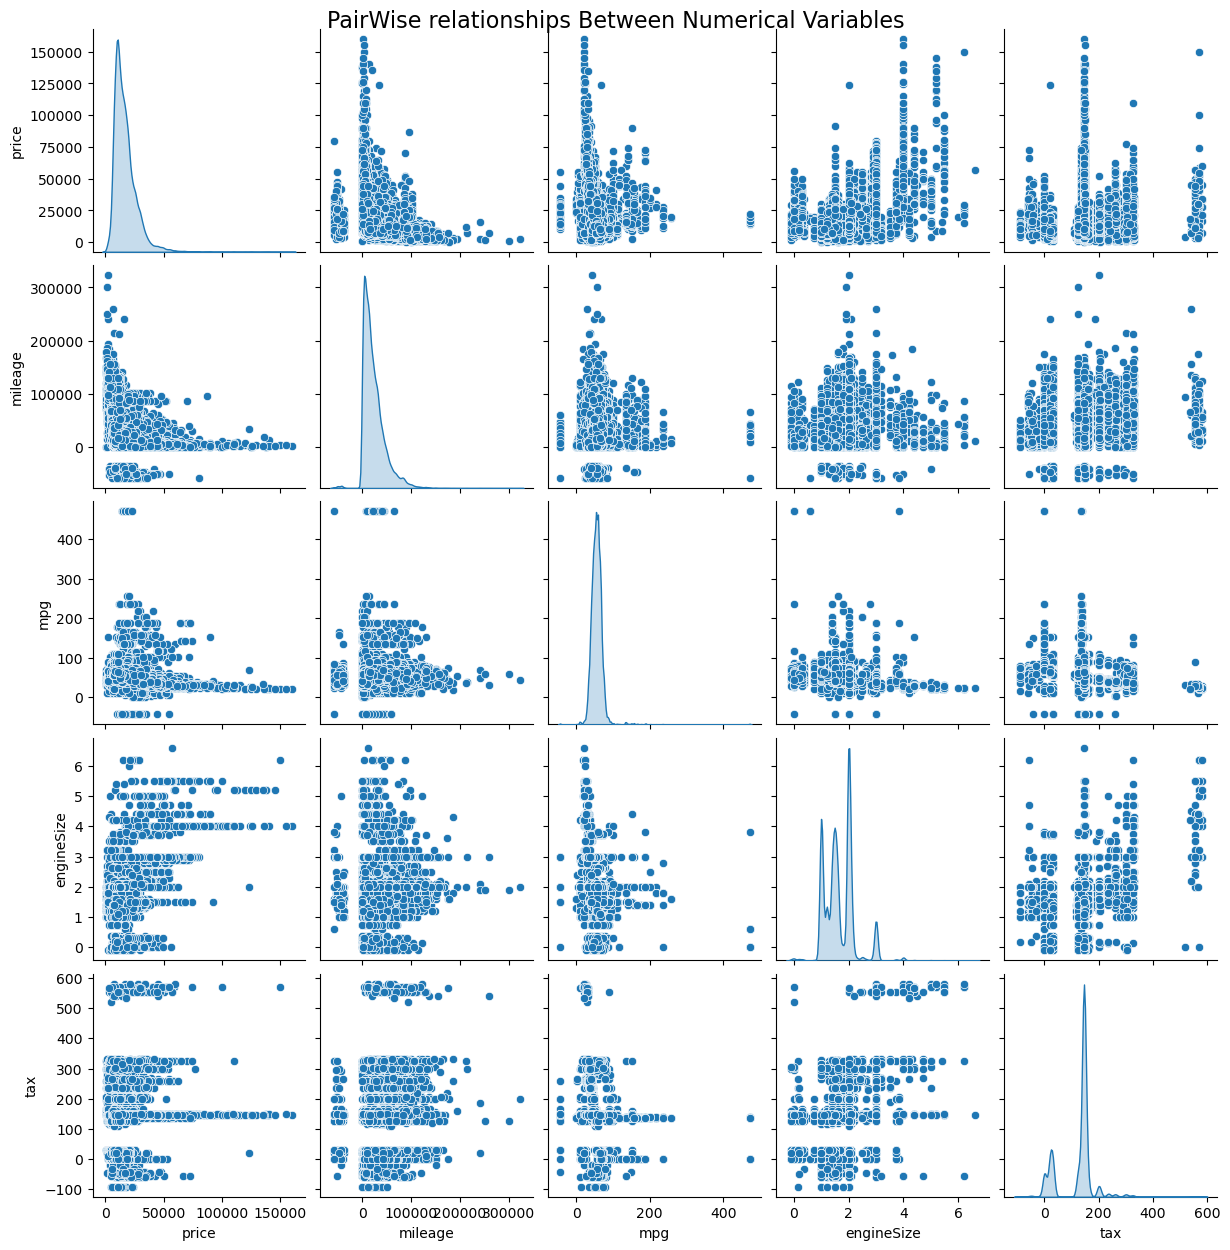

In [35]:
sns.pairplot(df_train[["price","mileage", "mpg", "engineSize", "tax"]], diag_kind="kde")
plt.suptitle("PairWise relationships Between Numerical Variables",
             y=1,
             fontsize=16)
plt.show()

A pairplot was used to obtain an initial visual overview of the relationships between the main numerical variables and the target variable. This exploratory analysis allows for the identification of broad trends and potential non-linear patterns without making formal assumptions about the underlying relationships.

From a visual perspective, `price` tends to decrease as `mileage` increases, while higher values of `engineSize` are generally associated with higher prices, albeit with substantial dispersion. These observations are purely exploratory and serve only to guide subsequent analysis, which relies on validated modeling and evaluation procedures.

<h5 style="color: #00E676;">Brand</h5> 

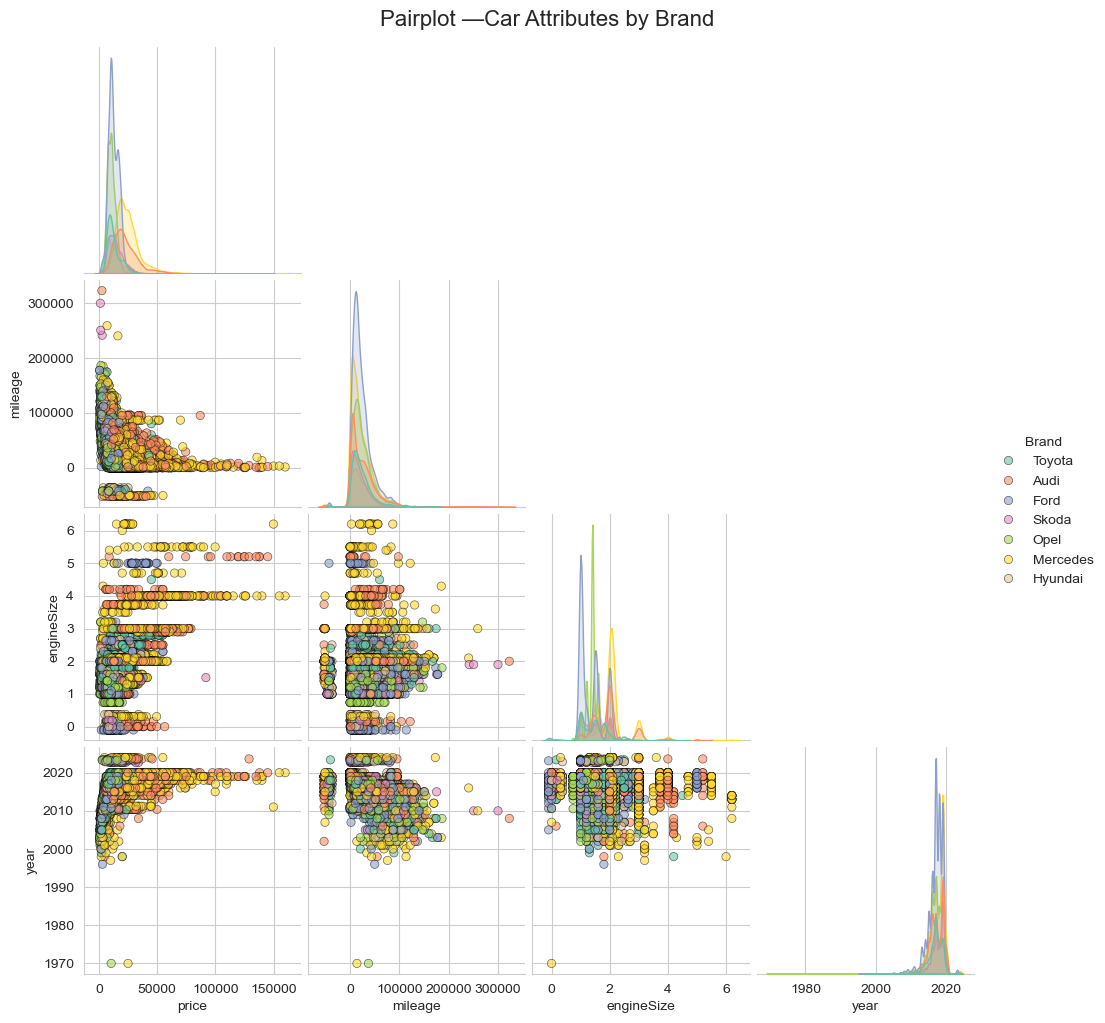

In [36]:
sns.set_style("whitegrid")

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]

sns.pairplot(
    df_filtered,
    vars=["price", "mileage", "engineSize", "year"],
    hue="Brand",
    palette="Set2",
    corner=True,
    plot_kws={"alpha":0.6, "edgecolor":"k"}
)
plt.suptitle("Pairplot —Car Attributes by Brand",
             y=1.02,
             fontsize=16)
plt.show()

The pairplot provides a consolidated visual overview of the relationships between key numerical variables and illustrates how these patterns vary across different brands. Consistent visual trends are observed across the plots, including a general increase in `price` with `year`, a decrease in `price` with increasing `mileage`, and differences in price levels associated with `engineSize`.

Brand-specific patterns are also evident. Certain brands tend to occupy higher ranges of price and engine size, while others are more concentrated in lower value regions across the examined variables. These differences highlight heterogeneity in how vehicle attributes are distributed across manufacturers.

Overall, this pairplot serves as an exploratory summary that brings together previously observed patterns and motivates further, more formal analysis to assess the relevance of these relationships.

<h5 style="color: #00E676;">Key Car Attributes by Transmission</h5> 

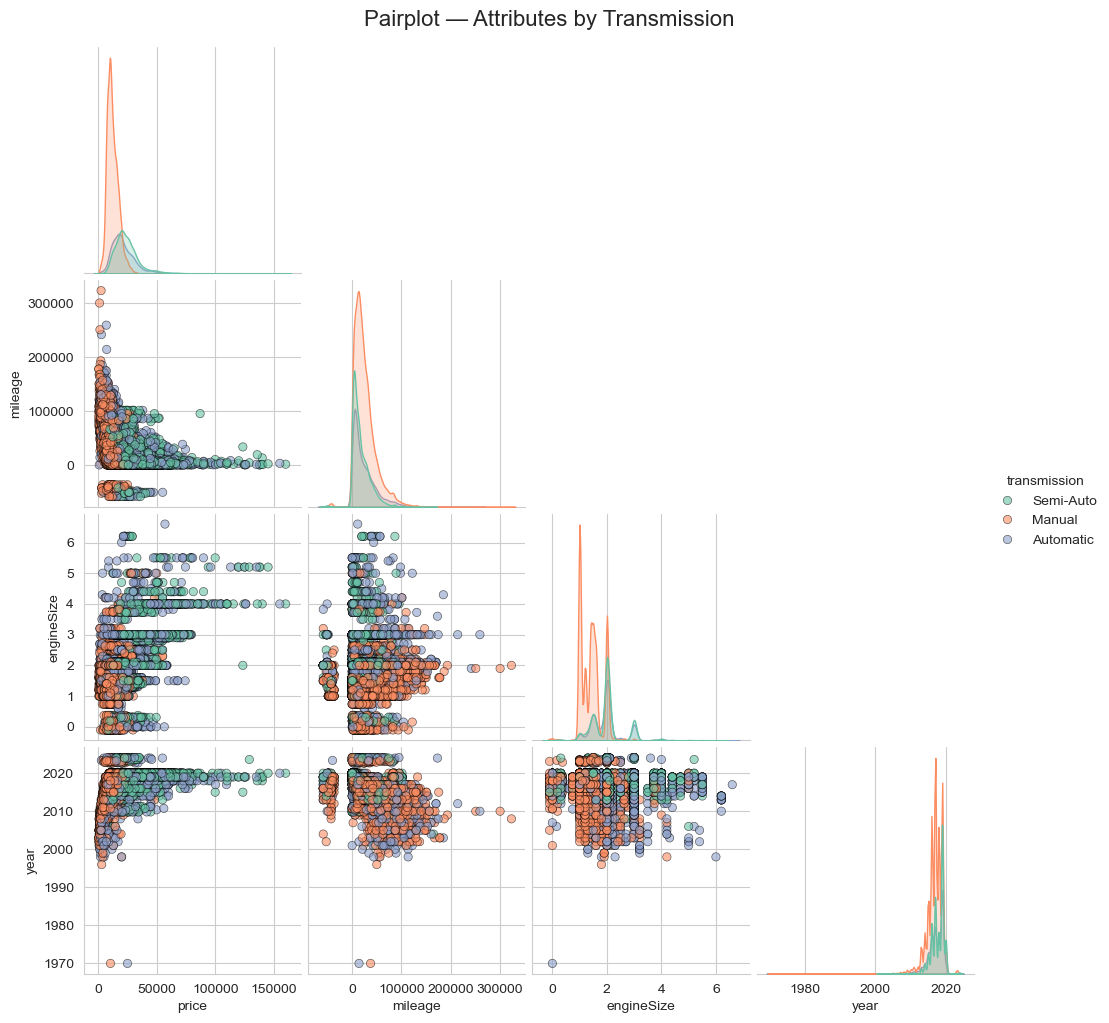

In [37]:
sns.set_style("whitegrid")

trans_filter = ["Automatic", "Manual", "Semi-Auto"]
df_filtered = df_train[df_train["transmission"].isin(trans_filter)]

sns.pairplot(
    df_filtered,
    vars=["price", "mileage", "engineSize", "year"],
    hue="transmission",
    palette="Set2",
    corner=True,
    plot_kws={"alpha":0.6, "edgecolor":"k"}
)

plt.suptitle("Pairplot — Attributes by Transmission", y=1.02, fontsize=16)
plt.show()

The pairplot highlights noticeable differences in the distribution of key numerical variables across transmission types. Automatic and Semi-Automatic vehicles tend to appear more frequently in higher price regions and are often associated with larger engine sizes, while Manual vehicles are more concentrated in lower to mid-range price and engine size values.

Differences are also observed in how mileage and production year are distributed across transmission categories, suggesting that transmission type is linked to distinct vehicle profiles within the dataset. These patterns indicate heterogeneity in the relationship between vehicle attributes and transmission type.

Overall, this analysis is exploratory and serves to highlight systematic differences across transmission categories, motivating further investigation in subsequent modeling stages.

<h5 style="color: #00E676;">Key Car Attributes by Fuel Type</h5> 

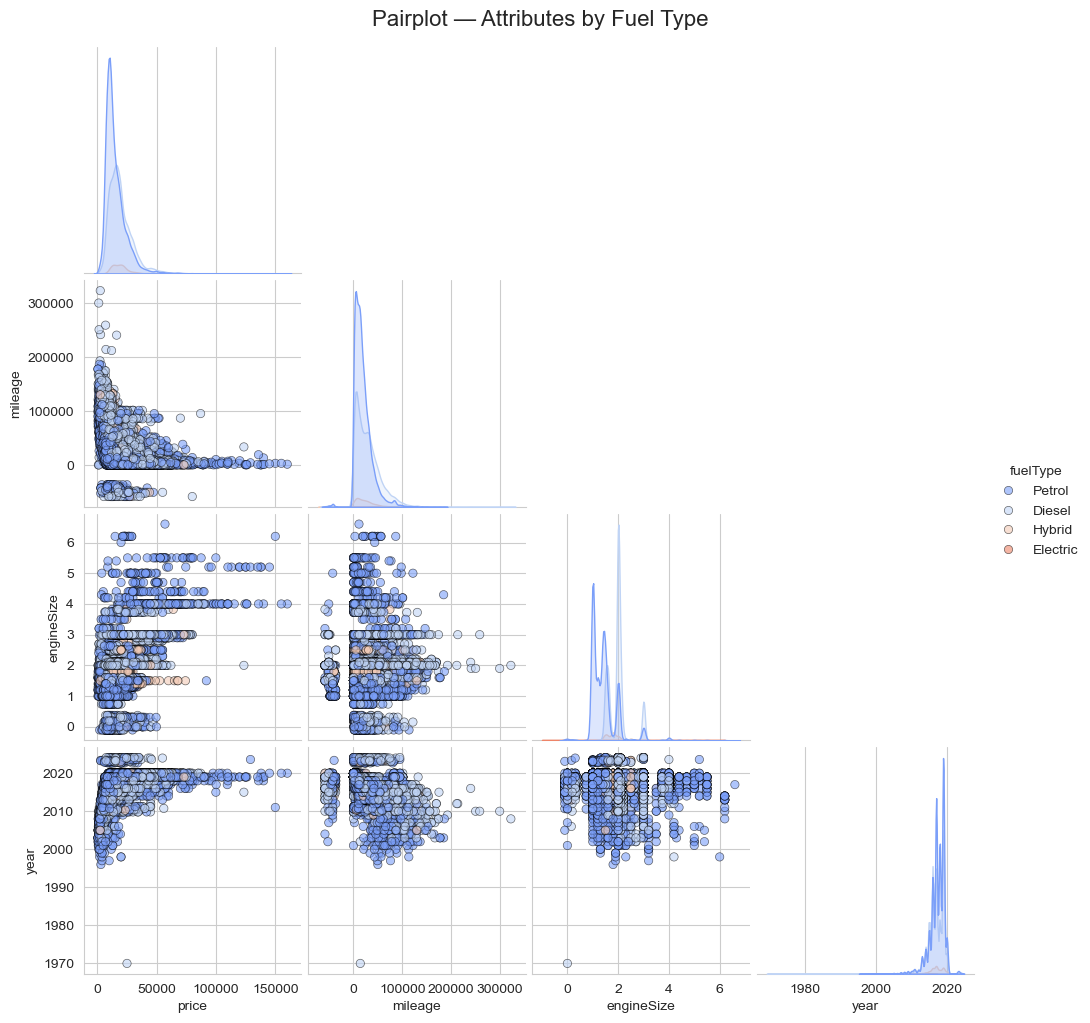

In [38]:
sns.set_style("whitegrid")

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]

sns.pairplot(
    df_filtered,
    vars=["price", "mileage", "engineSize", "year"],
    hue="fuelType",
    palette="coolwarm",
    corner=True,
    plot_kws={"alpha":0.6, "edgecolor":"k"}
)

plt.suptitle("Pairplot — Attributes by Fuel Type", y=1.02, fontsize=16)
plt.show()

The pairplot offers an exploratory overview of how vehicle attributes vary across different fuel types. Distinct patterns are visible in the distribution of price, production year, mileage, and engine size across fuel categories.

Hybrid and Electric vehicles are predominantly concentrated in more recent production years and tend to appear in higher price ranges, while also being associated with smaller engine sizes. In contrast, Petrol and Diesel vehicles are spread across a wider range of years, prices, mileages, and engine sizes, reflecting a broader diversity of vehicle profiles within these categories.

These observations highlight heterogeneity in how vehicle characteristics are distributed across fuel types and motivate further analysis to assess how such differences may influence predictive performance in later modeling stages.

<h4 style="color: #00E676;">Multivariate Analysis</h4> 

<h5 style="color: #00E676;">FuelType, Mileage and Price</h5> 

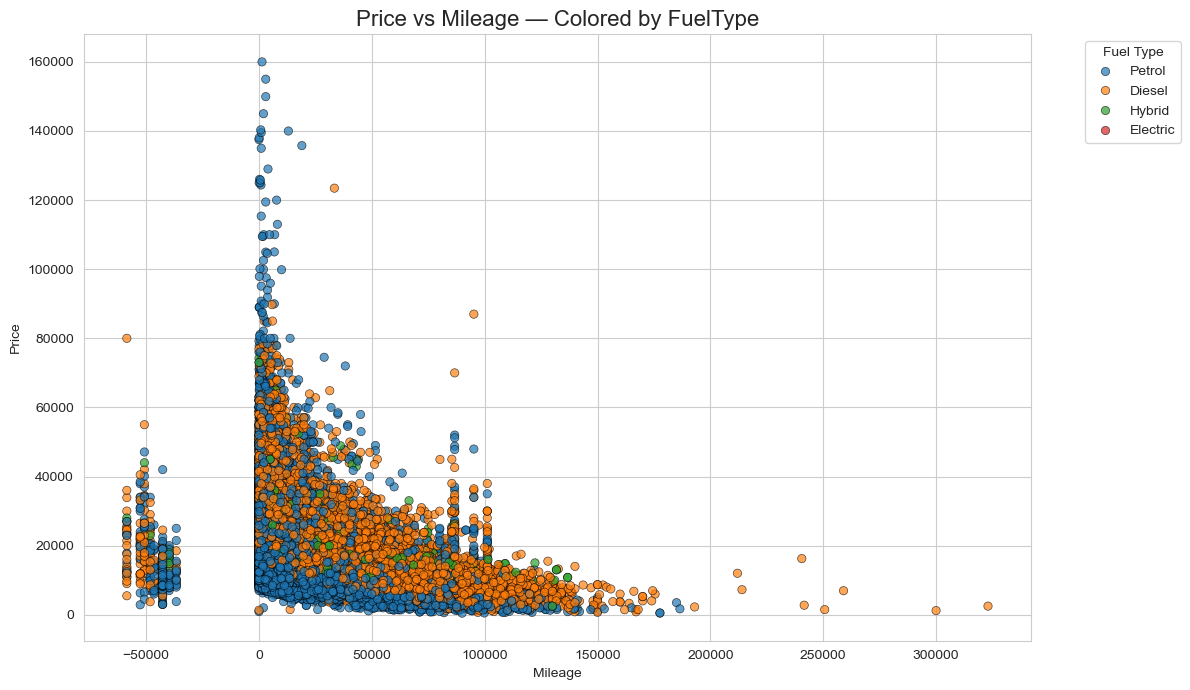

In [39]:
plt.figure(figsize=(12,7))

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]

sns.scatterplot(
    data=df_filtered,
    x="mileage",
    y="price",
    hue="fuelType",         
    alpha=0.7,
    edgecolor="black"
)

plt.title("Price vs Mileage — Colored by FuelType", fontsize=16)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Fuel Type")
plt.tight_layout()
plt.show()

The scatterplot highlights a clear decreasing trend between `price` and `mileage` across the most common fuel types, suggesting that higher mileage is generally associated with lower prices. This pattern appears consistently for Petrol and Diesel vehicles, although with substantial dispersion.

Additionally, the distribution of observations varies across fuel types. Hybrid and Electric vehicles are predominantly concentrated in regions of lower mileage and higher prices, reflecting differences in the characteristics of vehicles present in the dataset. These patterns indicate that the relationship between mileage and price is not uniform across fuel types and motivate a more detailed analysis that accounts for both continuous and categorical variables.

<h5 style="color: #00E676;">Brand, Mileage and Price</h5> 

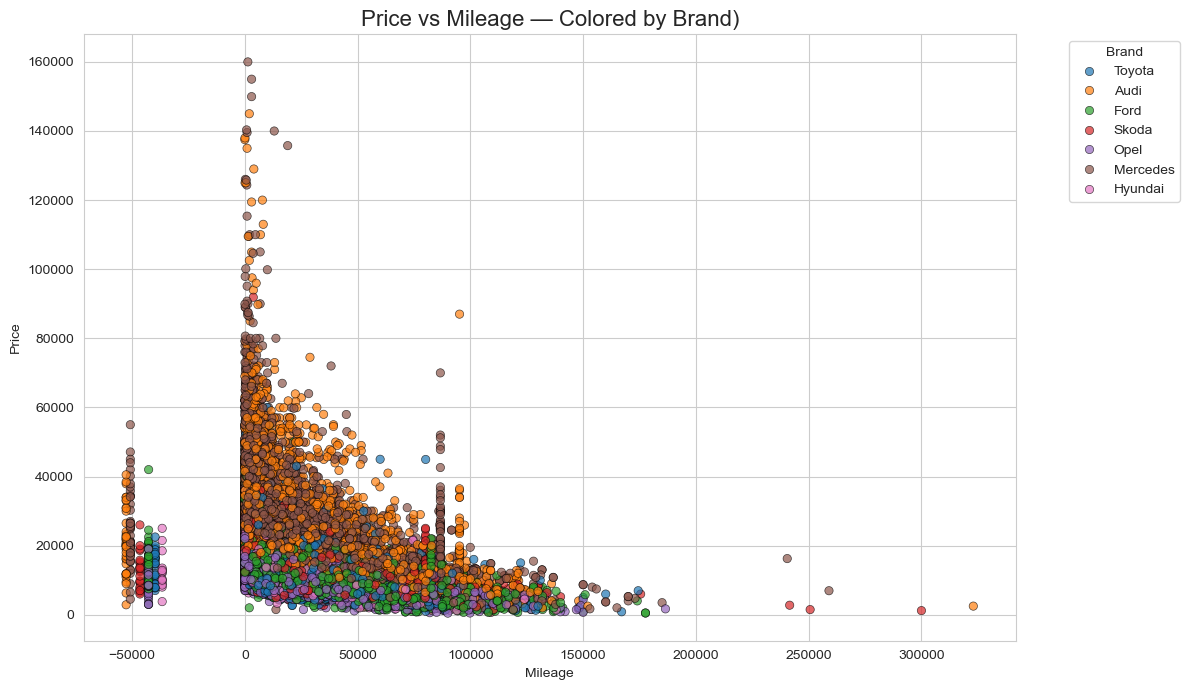

In [40]:
plt.figure(figsize=(12,7))

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]

sns.scatterplot(
    data=df_filtered,
    x="mileage",
    y="price",
    hue="Brand",         
    alpha=0.7,
    edgecolor="black"
)

plt.title("Price vs Mileage — Colored by Brand)",
          fontsize=16)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Brand")
plt.tight_layout()
plt.show()

The scatterplot reveals a clear segmentation of observations by brand. While all brands follow a general decreasing trend between `price` and `mileage`, systematic differences are observed across manufacturers.

Premium brands such as Audi, BMW, and Mercedes tend to occupy higher price regions across a wide range of mileage values, whereas mass-market brands such as Ford, Toyota, and VW are more concentrated in lower price ranges. This visual stratification suggests that brand-related characteristics influence price levels and depreciation patterns.

These observations are exploratory in nature and highlight the need to account for brand-related effects in subsequent stages of the analysis.

<h5 style="color: #00E676;">Price, Year and FuelType</h5> 

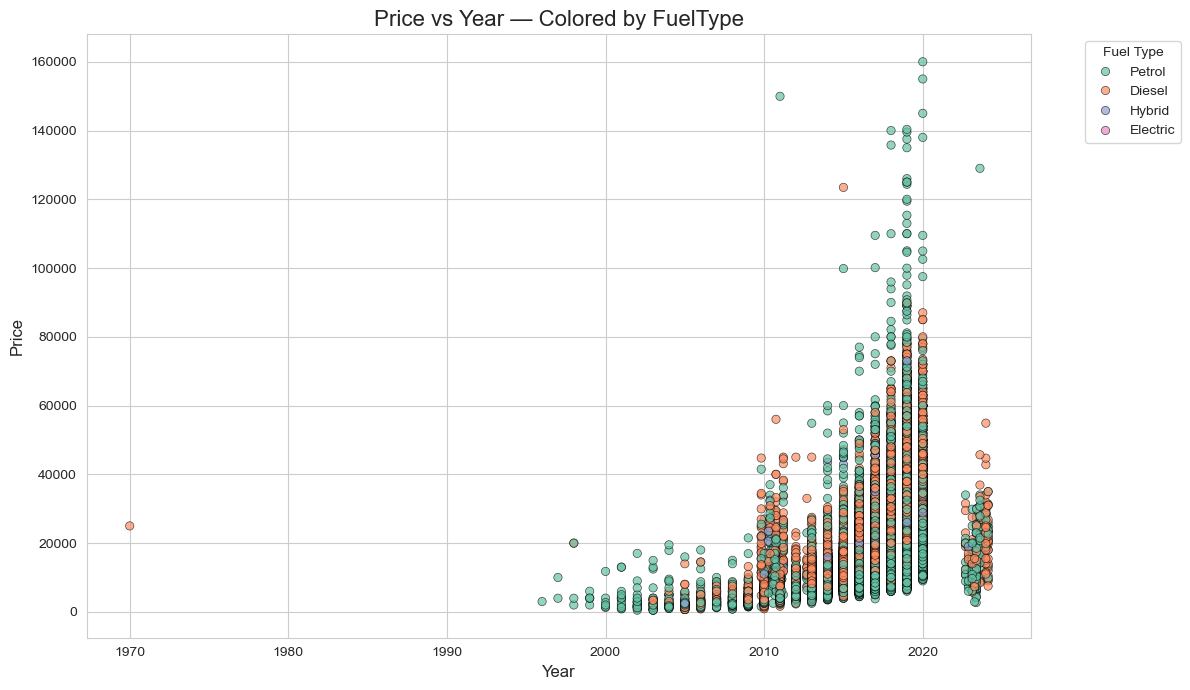

In [41]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]


sns.scatterplot(
    data=df_filtered,
    x="year",              
    y="price",                
    hue="fuelType",           
    palette="Set2",             
    alpha=0.7,                 
    edgecolor="k"            
)

# Titles and labels
plt.title("Price vs Year — Colored by FuelType",
          fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Fuel Type")
plt.tight_layout()
plt.show()

The scatterplot shows a clear upward trend between `year` and `price`, indicating that vehicles from more recent years tend to be associated with higher prices across all fuel types. This pattern is visually consistent, although substantial dispersion is observed within each year.

Differences across fuel types are also apparent. Petrol and Diesel vehicles are distributed across a wide temporal range, while Hybrid and Electric vehicles are predominantly concentrated in more recent years and generally occupy higher price regions. This reflects differences in the composition of the dataset and highlights heterogeneity in how vehicle characteristics relate to price.

These observations are exploratory and serve to motivate further analysis that accounts for both temporal effects and fuel-type-related differences.

<h5 style="color: #00E676;">Price, Year and Brand</h5> 

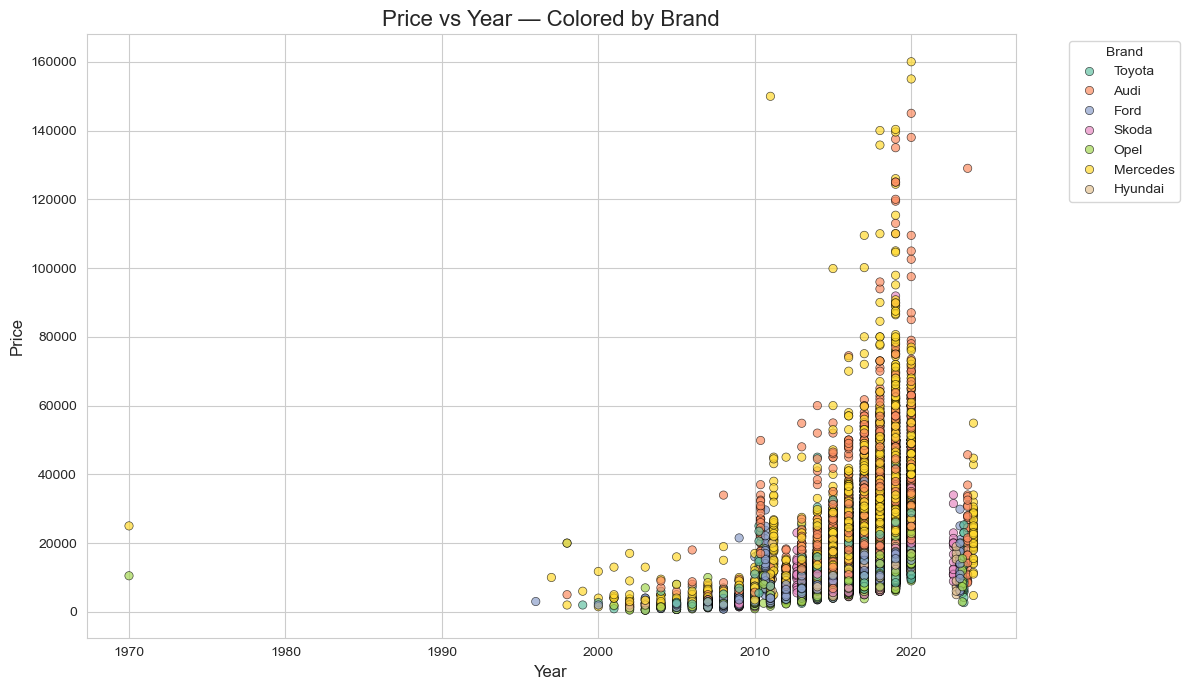

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]


sns.scatterplot(
    data=df_filtered,
    x="year",                
    y="price",                 
    hue="Brand",             
    palette="Set2",           
    alpha=0.7,                 
    edgecolor="k"               
)


plt.title("Price vs Year — Colored by Brand", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Brand")
plt.tight_layout()
plt.show()

The scatterplot highlights a clear stratification of vehicle prices by brand across different production years. While all brands exhibit an upward trend between `year` and `price`, systematic differences in price levels are observed between manufacturers.

Brands commonly regarded as higher-end, such as Audi, BMW, and Mercedes, tend to occupy higher price regions at comparable production years, whereas brands such as Ford, Toyota, VW, Opel, and Hyundai are more concentrated in lower price ranges. This vertical separation is visually consistent across the observed time span and reflects heterogeneity in how different brands are positioned in the market.

These patterns are exploratory and indicate that brand-related characteristics play a role in shaping price distributions over time, motivating further analysis that accounts for such categorical differences.

<h4 style="color: #00E676;">BoxPlots to distributions</h4> 

<h5 style="color: #00E676;">Price distribution by Brand</h5> 

C:\Users\danie\AppData\Local\Temp\ipykernel_22968\381057388.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


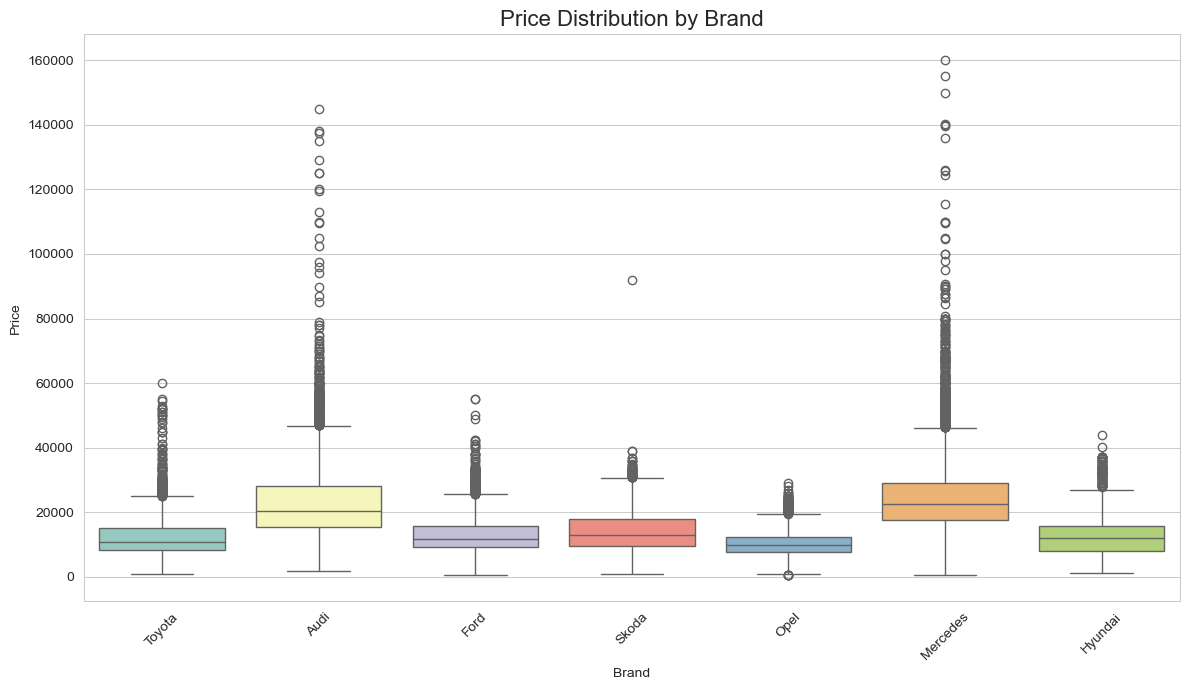

In [43]:
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]

sns.boxplot(
    data=df_filtered,
    x="Brand",
    y="price",
    palette="Set3"
)

plt.title("Price Distribution by Brand", fontsize=16)
plt.xlabel("Brand")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The boxplot analysis highlights a clear **vertical stratification** of vehicle prices across brands. **Premium brands**, such as `Mercedes` and `Audi`, exhibit the **highest median prices** and wider **interquartile ranges (IQR)**, indicating both higher market positioning and greater price variability.

In contrast, **mass-market brands** (`Ford`, `VW`, `Toyota`, `Skoda`, `Opel`, `Hyundai`) consistently occupy the **lower price tier**, with substantially lower median prices and generally narrower IQRs.

Across all brands, the presence of multiple **upper outliers** suggests that high-priced vehicles (e.g., luxury or performance variants) can still be found within otherwise lower-priced segments.

Overall, this strong segmentation confirms that `Brand` is a **relevant categorical variable** for capturing differences in price distributions and should be retained for subsequent modeling stages.


<h5 style="color: #00E676;">Price Distribution by Transmission</h5> 

C:\Users\danie\AppData\Local\Temp\ipykernel_22968\4222811036.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


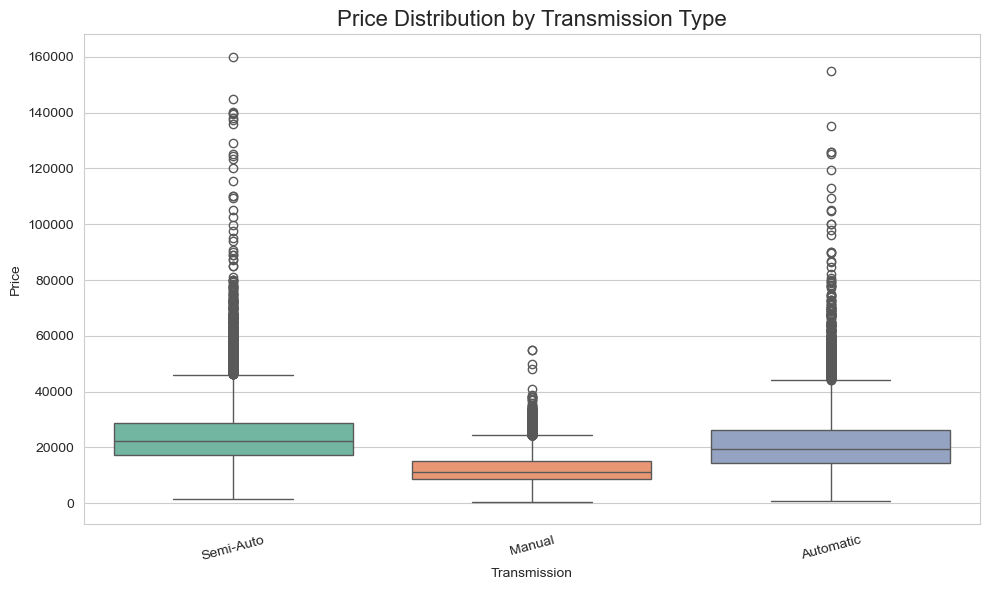

In [44]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

trans_filter = ["Automatic", "Manual", "Semi-Auto"]
df_filtered = df_train[df_train["transmission"].isin(trans_filter)]

sns.boxplot(
    data=df_filtered,
    x="transmission",
    y="price",
    palette="Set2"
)

plt.title("Price Distribution by Transmission Type", fontsize=16)
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

The boxplot highlights a clear **price stratification by transmission type**. Vehicles with `Automatic` transmission exhibit the **highest median prices**, followed closely by `Semi-Auto`, while `Manual` cars consistently show the **lowest median price levels**.

In addition to higher medians, `Automatic` and `Semi-Auto` transmissions present a **larger interquartile range (IQR)** and a higher number of **upper-end outliers**, indicating greater price variability and a stronger presence in the **high-value segment** of the market. This suggests that these transmission types are more commonly associated with newer, more powerful, or premium vehicles.

Conversely, `Manual` transmission vehicles are concentrated in a **lower and narrower price range**, reflecting their predominance in more affordable and mass-market segments.

These observations reinforce that `Transmission` acts as a **relevant categorical feature**, influencing both the central tendency and dispersion of vehicle prices, and therefore should be explicitly encoded and retained in the predictive modeling stage.


<h5 style="color: #00E676;">Price Distribution by FuelType</h5> 

C:\Users\danie\AppData\Local\Temp\ipykernel_22968\4062865563.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


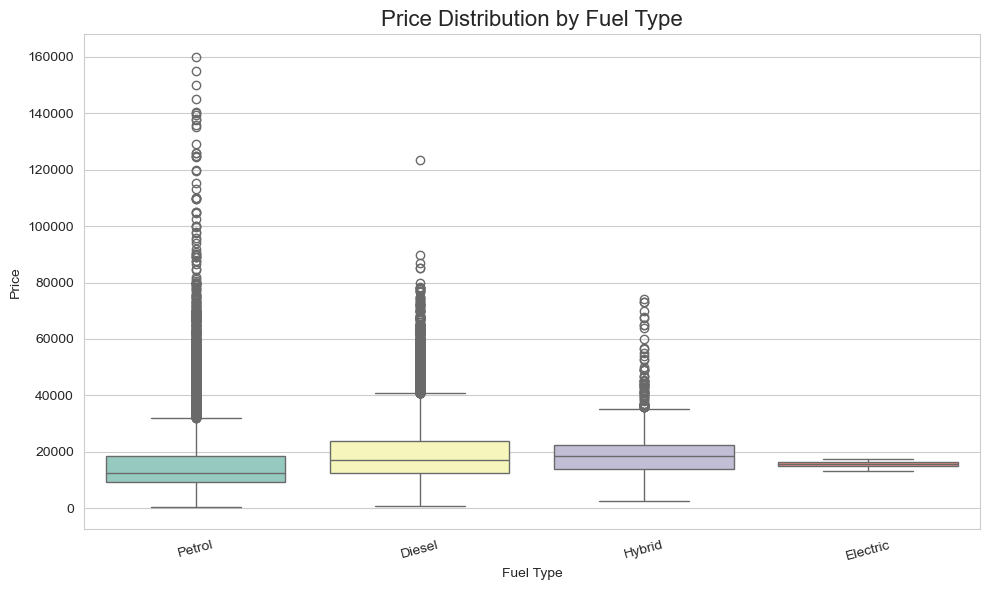

In [45]:
sns.set_style("whitegrid")

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_filtered,
    x="fuelType",
    y="price",
    palette="Set3"
)

plt.title("Price Distribution by Fuel Type", fontsize=16)
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

The boxplot of `Price` segmented by `Fuel Type` reveals **clear differences in price distributions** across fuel technologies. `Hybrid` and `Electric` vehicles exhibit the **highest median prices**, reflecting their concentration in more recent model years and their positioning in higher-value market segments.

`Diesel` vehicles occupy an intermediate price range, with a higher median price than `Petrol` cars, which consistently show the **lowest median prices** among all fuel types. This suggests that diesel vehicles tend to retain relatively higher market values compared to petrol vehicles within the dataset.

All fuel categories present a noticeable number of **upper-end outliers**, indicating the presence of high-value or premium models across all fuel types rather than being exclusive to a single category.

Overall, this analysis confirms that `Fuel Type` acts as a **relevant categorical variable**, contributing to systematic differences in vehicle price distributions and justifying its inclusion in the predictive modeling process.


In [46]:
numeric_features = [
    'year', 'mileage', 'tax', 'mpg',
    'engineSize', 'previousOwners'
]
print("Numeric features:", numeric_features)

Numeric features: ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'previousOwners']


<h5 style="color: #00E676;">Variance Analysis</h5>

In [47]:
num_for_variance = df_train[numeric_features]

variances = num_for_variance.var().sort_values()
variances

engineSize        3.288583e-01
previousOwners    2.169674e+00
year              4.878373e+00
mpg               2.721786e+02
tax               4.293025e+03
mileage           4.897275e+08
dtype: float64

<h5 style="color: #00E676;">Correlation Indices </h5>

                year  mileage   tax   mpg  engineSize  previousOwners
year            1.00    -0.67  0.18 -0.12       -0.04             0.0
mileage        -0.67     1.00 -0.20  0.17        0.10             0.0
tax             0.18    -0.20  1.00 -0.42        0.26             0.0
mpg            -0.12     0.17 -0.42  1.00       -0.23            -0.0
engineSize     -0.04     0.10  0.26 -0.23        1.00             0.0
previousOwners  0.00     0.00  0.00 -0.00        0.00             1.0


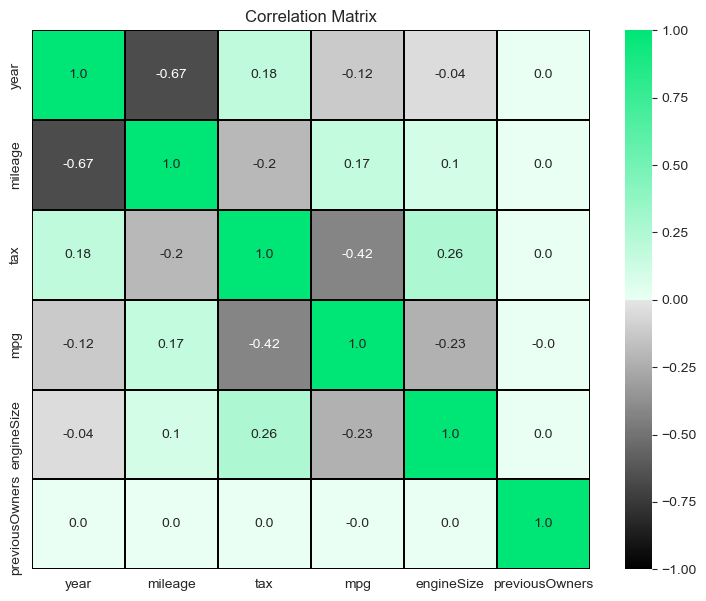

In [48]:
corr_features_pearson = df_train[numeric_features].corr(method="pearson").round(2)
print(corr_features_pearson)

plt.figure(figsize=(9,7),dpi=100)
cmap = LinearSegmentedColormap.from_list("black_to_green",
    [(0.0, "#000000"), (0.50, "#e6e6e6"), (0.5001, "#eafff3"), (1.0, "#00E676")]
)
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
sns.heatmap(
    corr_features_pearson,
    annot= True,
    fmt="", 
    cmap=cmap,
    linecolor="black",
    linewidths=0.1,
    norm = norm,
)
plt.title("Correlation Matrix")
plt.show()

                year  mileage   tax   mpg  engineSize  previousOwners
year            1.00    -0.78  0.32 -0.31       -0.04             0.0
mileage        -0.78     1.00 -0.25  0.32        0.10             0.0
tax             0.32    -0.25  1.00 -0.55        0.16            -0.0
mpg            -0.31     0.32 -0.55  1.00       -0.20             0.0
engineSize     -0.04     0.10  0.16 -0.20        1.00             0.0
previousOwners  0.00     0.00 -0.00  0.00        0.00             1.0


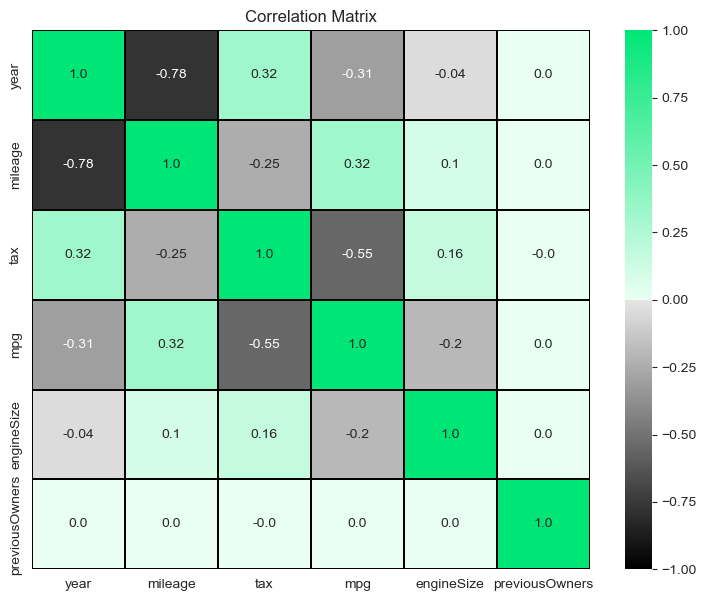

In [49]:
corr_features_spearman = df_train[numeric_features].corr(method="spearman").round(2)
print(corr_features_spearman)

plt.figure(figsize=(9,7),dpi=100)
cmap = LinearSegmentedColormap.from_list("black_to_green",
    [(0.0, "#000000"), (0.50, "#e6e6e6"), (0.5001, "#eafff3"), (1.0, "#00E676")]
)
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
sns.heatmap(
    corr_features_spearman,
    annot= True,
    fmt="", 
    cmap=cmap,
    linecolor="black",
    linewidths=0.1,
    norm = norm,
)
plt.title("Correlation Matrix")
plt.show()

In [50]:
spearman_threshold = 0.15

df_num_with_target = df_train[numeric_features + ["price"]]
corr_target_spearman = df_num_with_target.corr(method="spearman")["price"].drop("price")

spearman_selected = corr_target_spearman[ corr_target_spearman.abs() >= spearman_threshold ].index.tolist()
print("Numeric selected by Spearman (|ρ| >= 0.15):", spearman_selected)

Numeric selected by Spearman (|ρ| >= 0.15): ['year', 'mileage', 'tax', 'mpg', 'engineSize']


In [51]:
corr_with_target = df_train[numeric_features + ["price"]].corr()["price"].sort_values(ascending=False)
corr_with_target

price             1.000000
engineSize        0.612243
year              0.475712
tax               0.297102
previousOwners   -0.000030
mpg              -0.285626
mileage          -0.405266
Name: price, dtype: float64

Variance and correlation analyses were conducted as part of the exploratory data analysis to better understand the statistical properties and relationships among numerical variables.

The variance analysis reveals substantial differences in scale across numerical features, with mileage and tax exhibiting the highest dispersion, while engineSize and previousOwners display comparatively lower variance. Importantly, low variance alone does not imply low predictive relevance, particularly for non-linear models.

Correlation analysis using both Pearson and Spearman coefficients highlights several meaningful relationships. A strong negative correlation between year and mileage reflects expected vehicle usage patterns, while moderate correlations between tax, mpg, and engineSize indicate structural dependencies between technical specifications. Correlation with the target variable (price) shows that engineSize and year are among the most strongly associated numerical predictors, whereas previousOwners exhibits a near-zero relationship with price.

These analyses are intended for descriptive and diagnostic purposes only. **No features were removed** at this stage based on variance or correlation values. Instead, these insights informed subsequent modelling decisions, where feature relevance was assessed empirically through cross-validation across different model classes.

<h2 style="color: #00E676;">2.2. Data Preprocessing</h2>

In [52]:
df_train.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,Vw,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,Fiesta,2018.0,12500,Anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,Bmw,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [53]:
df_train.describe().round(2)

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.00,74482.00,75973.00,74510.00,68069.00,68047.00,74457.00,74449.00,74423.00,74425.0
mean,37986.00,2017.10,16881.89,23004.18,120.33,55.15,1.66,64.59,1.99,0.0
std,21931.66,2.21,9736.93,22129.79,65.52,16.50,0.57,21.02,1.47,0.0
min,0.00,1970.00,450.00,-58540.57,-91.12,-43.42,-0.10,1.64,-2.35,0.0
25%,18993.00,2016.00,10200.00,7423.25,125.00,46.30,1.20,47.00,1.00,0.0
50%,37986.00,2017.00,14699.00,17300.00,145.00,54.30,1.60,65.00,2.00,0.0
75%,56979.00,2019.00,20950.00,32427.50,145.00,62.80,2.00,82.00,3.00,0.0
max,75972.00,2024.12,159999.00,323000.00,580.00,470.80,6.60,125.59,6.26,0.0


In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           75973 non-null  object 
 2   model           75973 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    75973 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        75973 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [55]:
df_train_new = df_train.copy()
df_test_new  = df_test.copy()

<h4 style="color: #00E676;">Remove column "HasDamage"</h4> 

In [56]:
#Function to remove "hasDamage and paintQuality%"
def initial_cleaning(df):
    if "hasDamage" in df.columns:
        df = df.drop(columns=["hasDamage", "paintQuality%"])
    
    return df

In [57]:
#Aplly the function for the train and the test datasets
df_train_new = initial_cleaning(df_train_new)
df_test_new = initial_cleaning(df_test_new)
df_train_new.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,previousOwners
0,69512,Vw,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,4.000000
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,1.000000
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,4.000000
3,29021,Ford,Fiesta,2018.0,12500,Anual,9102.0,Petrol,145.0,65.700000,1.0,-2.340306
4,10062,Bmw,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,3.000000


**Dropping** the `HasDamage` column, as no positive damage cases are observed in the available data, and the variable does not provide discriminative information for the modeling task. **Dropping** the `paintQuality%` column because it is the mechanic’s assessment of the cars’ overall paint quality and hull integrity not relevant for the model.
The **removal** of the variables is performed prior to model training as a design choice based on domain knowledge and deployment constraints, and does not rely on any information derived from the target variable. All subsequent preprocessing steps that involve estimation from the data (e.g., imputation, scaling, encoding) are applied exclusively within the cross-validation framework to avoid information leakage.

<h3 style="color: #00E676;">2.1. Digitalization Problems Solve</h3>

<h4 style="color: #00E676;">2.1.1. Brand </h4>

**Correction** of the **brand names** in the `Brand` column, with only the `N/A` **values remaining** using the function dig_solve_brand.

In [58]:
def dig_solve_brand(df):
    """
    Cleans and standardizes the Brand column by correcting common typos,
    harmonizing brand names, and setting invalid entries as NaN.
    """
    brand_clean = df["Brand"].astype(str).str.strip().str.lower()

    #Corrections dictionary
    corrections = {
        "ercece": "mercedes", "mercede": "mercedes", "ercedes": "mercedes", "ercede": "mercedes",
        "for": "ford", "ord": "ford", "or": "ford",
        "bmw": "bmw", "mw": "bmw", "bm": "bmw", "m": "bmw",
        "ope": "opel", "pel": "opel", "pe": "opel",
        "vw": "vw", "w": "vw", "v": "vw",
        "aud": "audi", "udi": "audi", "ud": "audi",
        "oyota": "toyota", "toyot": "toyota", "oyot": "toyota",
        "koda": "skoda", "skod": "skoda", "kod": "skoda",
        "hyunda": "hyundai", "yundai": "hyundai", "yunda": "hyundai",
        "": np.nan, "nan": np.nan, "none": np.nan, "unknown": np.nan
    }

    # Apply corrections
    brand_clean = brand_clean.replace(corrections)

    # Standardize capitalization
    df["Brand_clean"] = brand_clean.str.title()

    return df

In [59]:
#Aplly function to the train and test datasets
df_train_new = dig_solve_brand(df_train_new)
df_test_new = dig_solve_brand(df_test_new)
df_train_new["Brand_clean"].value_counts(dropna=False)

Brand_clean
Ford        16063
Mercedes    11674
Vw          10385
Opel         9352
Bmw          7392
Audi         7325
Toyota       4622
Skoda        4303
Hyundai      3336
NaN          1521
Name: count, dtype: int64

<h4 style="color: #00E676;">2.1.2. Fuel Type </h4>

**Correct** the **names** of the **different fuel types** in the `Fueltype` column, leaving only the `N/A` **values remaining** using the function dig_solve_type.

In [60]:
def dig_solve_type(df):
    """
    Cleans and standardizes the fuelType column by correcting common typos
    and mapping invalid or unknown entries to NaN.
    """
    fuel = df["fuelType"].astype(str).str.strip().str.lower()

    # Corrections dictionary
    corrections = {
        "petro": "petrol", "etrol": "petrol", "etro": "petrol",
        "iesel": "diesel", "diese": "diesel", "iese": "diesel",
        "hybri": "hybrid", "ybrid": "hybrid", "ybri": "hybrid",
        "other": np.nan, "othe": np.nan, "ther": np.nan, 
        "": np.nan, "nan": np.nan, "none": np.nan, "unknown": np.nan
    }

    # Apply corrections
    fuel = fuel.replace(corrections)
    df["fuelType_clean"] = fuel

    return df

In [61]:
#Aplly function to the train and test datasets
df_train_new = dig_solve_type(df_train_new)
df_test_new = dig_solve_type(df_test_new)
df_train_new["fuelType_clean"].value_counts(dropna=False)


fuelType_clean
petrol      41181
diesel      30885
hybrid       2225
NaN          1678
electric        4
Name: count, dtype: int64

<h4 style="color: #00E676;">2.1.3. Transmission </h4>


**Correct** the **names** of the **different transmission types** in the `transmission` column, leaving only the `N/A` **values remaining** using the function dig_solve_transmission.

In [62]:
def dig_solve_transmission(df):
    """
    Cleans and standardizes the transmission column by correcting common typos
    and harmonizing transmission categories.
    """

    tr = df["transmission"].astype(str).str.strip().str.lower()

    # Corrections dictionary
    corrections = {
        "anual": "manual", "manua": "manual", "anua": "manual",
        "semi-aut": "semi-auto", "emi-auto": "semi-auto", "emi-aut": "semi-auto",
        "automati": "automatic", "utomatic": "automatic", "utomati": "automatic",
        "unknown": np.nan, "unknow": np.nan, "nknown": np.nan, "nknow": np.nan,
        "other": np.nan,
        "": np.nan, "nan": np.nan, "none": np.nan
    }

    # Apply corrections
    tr = tr.replace(corrections)
    df["transmission_clean"] = tr

    return df

In [63]:
#Aplly function to the train and test datasets
df_train_new = dig_solve_transmission(df_train_new)
df_test_new = dig_solve_transmission(df_test_new)
df_test_new["transmission_clean"].value_counts(dropna=False)


transmission_clean
manual       17889
semi-auto     7267
automatic     6440
NaN            971
Name: count, dtype: int64

In [64]:
print(df_train_new.shape)
print(df_test_new.shape)

(75973, 15)
(32567, 14)


<h4 style="color: #00E676;">2.1.4. Model - Correction model names with RapidFuzz </h4>

A normalization function `(_norm)` was developed to **standardize strings** before correction, converting them to **lowercase**, **special characters**, and **extra spaces** to ensure **consistent comparisons**.

Then, the `find_best_in_catalog` function was created to check whether a **value exists** in the **canonical catalog** and, if not, apply approximate **matching** (fuzzy matching) using the `RapidFuzz` library. The algorithms `token_set_ratio` and `token_sort_ratio` were used, returning the most **similar value**, its similarity score, and the method applied. Two `thresholds` (threshold_high and threshold_low) were also defined to **control** the **confidence level** of accepted matches.

Based on this function, a **canonical catalog** of models was built for **each brand**, considering only models with a frequency above a brand-specific limit defined in `threshold_dict`. For each brand, the function was applied within its ***respective catalog**, and valid matches (`token_set` or `token_sort`) were stored in a **mapping** dictionary (`model_cleaning_dict`).

Finally, the `model_clean_fuzzy` column was created to apply the **automatic corrections** stored in the **dictionary**, **keeping** the **original value** when **no match** was found. This process ensured a conservative standardization of model names within each brand, reducing high-confidence spelling errors and inconsistencies while preserving the original values when no reliable correction could be established.

In [65]:
def _norm(s):
    """
    Normalizes a string to a canonical form for robust text comparison.

    This function standardizes textual inputs by:
    - Handling missing values safely
    - Converting to lowercase using casefold
    - Removing diacritics (accented characters)
    - Replacing separators (/, _, -, .) with spaces
    - Collapsing multiple spaces

    The resulting string is used exclusively for comparison and matching,
    not for presentation purposes.
    """
    if s is None or (isinstance(s, float) and pd.isna(s)):
        return ""
    s = str(s).casefold().strip()
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    s = re.sub(r"[/_.\-]+", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

def find_best_in_catalog(word, catalog_list, threshold_high=92, threshold_low=85):
    """
    Attempts to match a given string to a canonical catalog entry using
    fuzzy string matching.

    The function first checks for an exact match after normalization.
    If none is found, approximate matching is performed using
    RapidFuzz's token_set_ratio and token_sort_ratio.

    Two thresholds are used to control match confidence:
    - threshold_high: high-confidence automatic correction
    - threshold_low: acceptable but less confident correction

    Returns:
        - matched canonical value
        - similarity score
        - matching method used
    """
    if word is None or (isinstance(word, float) and pd.isna(word)):
        return (word, 0.0, "null")

    if not catalog_list:
        return (word, 0.0, "no_catalog")

    word_norm = _norm(word)

    # normalize the catalog while keeping the canonical values
    # (if collisions occur, the last one is kept — ideally the catalog is already canonical)
    norm_to_canon = {_norm(c): c for c in catalog_list}
    catalog_norm = list(norm_to_canon.keys())

    # exact match after normalization
    if word_norm in norm_to_canon:
        return (norm_to_canon[word_norm], 100.0, "exact_in_catalog")

    best_norm, score, _ = process.extractOne(
        word_norm, catalog_norm, scorer=fuzz.token_set_ratio
    )
    method = "token_set"

    best_norm2, score2, _ = process.extractOne(
        word_norm, catalog_norm, scorer=fuzz.token_sort_ratio
    )
    if score2 > score:
        best_norm, score, method = best_norm2, score2, "token_sort"

    best_canon = norm_to_canon.get(best_norm, word)

    if score >= threshold_high:
        return (best_canon, float(score), method)
    elif score >= threshold_low:
        return (best_canon, float(score), method)
    else:
        return (best_canon, float(score), "review")

def build_model_catalog(df_train, threshold_dict):
    """
    Builds a canonical catalog of valid model names for each brand,
    based on frequency thresholds.

    For each brand, only model names that appear at least a minimum
    number of times (brand-specific threshold) are retained in the catalog.
    This avoids correcting rare or potentially incorrect model names.

    Returns a dictionary mapping normalized brand names to lists of
    canonical model names.
    """
    catalog_dict = {}

    # ensure that Brand_clean is normalized in the same way as in threshold_dict (e.g., "ford")
    brands = df_train["Brand_clean"].dropna().unique()

    for brand in brands:
        brand_norm = _norm(brand)
        df_brand = df_train[df_train["Brand_clean"] == brand].copy()

        # count occurrences by ORIGINAL "model"
        # (you may choose to count by _norm(model) if there is high variability)
        freq = (
            df_brand.dropna(subset=["model"])
            .groupby("model")
            .size()
            .reset_index(name="count")
            .sort_values(by="count", ascending=False)
        )

        threshold = threshold_dict.get(brand_norm, 0)
        catalog_dict[brand_norm] = list(
            freq.loc[freq["count"] >= threshold, "model"]
        )

    return catalog_dict



def build_model_cleaning_dict(df_train, catalog_dict):
    """
    Builds a mapping dictionary used to automatically correct model names
    within each brand.

    For each (brand, model) pair, fuzzy matching is applied against the
    brand-specific canonical catalog. Corrections are stored only when
    the similarity score exceeds predefined confidence thresholds.

    This ensures that only high-confidence corrections are applied,
    minimizing the risk of incorrect replacements.
    """
    cleaning_dict = {}

    for brand in df_train["Brand_clean"].dropna().unique():
        brand_norm = _norm(brand)
        df_brand = df_train[df_train["Brand_clean"] == brand].copy()
        catalog_list = catalog_dict.get(brand_norm, [])

        for model in df_brand["model"].dropna().unique():
            match, score, status = find_best_in_catalog(model, catalog_list)

            # normalized (robust) key
            key = f"{brand_norm}-{_norm(model)}"

            # only auto-correct when confidence is high
            if status in ("token_set", "token_sort", "exact_in_catalog"):
                cleaning_dict[key] = match

    return cleaning_dict

def apply_model_cleaning(df, cleaning_dict, out_col="model_clean_fuzzy"):
    """
    Applies the automatic model name corrections stored in a cleaning
    dictionary.

    Corrections are applied only when both brand and model are present
    and a high-confidence mapping exists. When no correction is found,
    the original value is preserved.

    This guarantees that the cleaning process is conservative and
    does not introduce artificial modifications.
    """
    df = df.copy()

    brand_norm = df["Brand_clean"].map(_norm)
    model_norm = df["model"].map(_norm)

    key = brand_norm + "-" + model_norm

    # only attempt mapping when both brand and model are present
    mask = df["Brand_clean"].notna() & df["model"].notna()
    df[out_col] = df["model"]

    df.loc[mask, out_col] = (
        key[mask].map(cleaning_dict).fillna(df.loc[mask, "model"])
    )

    # optional: standardize presentation only, without altering canonical values
    df[out_col] = df[out_col].astype(str).str.strip()

    return df


In [66]:
threshold_dict = {
    "ford": 139,
    "vw": 40,
    "opel": 66,
    "mercedes": 128,
    "bmw": 66,
    "audi": 219,
    "toyota": 34,
    "skoda": 86,
    "hyundai": 70,
}

In [67]:
catalog_dict = build_model_catalog(df_train_new, threshold_dict)
model_cleaning_dict = build_model_cleaning_dict(df_train_new, catalog_dict)
df_train_new = apply_model_cleaning(df_train_new, model_cleaning_dict)
df_test_new  = apply_model_cleaning(df_test_new,  model_cleaning_dict)


In [68]:
df_train["model"].apply(type).value_counts()

model
<class 'str'>    75973
Name: count, dtype: int64

In [69]:
df_train_new["model_clean_fuzzy"].apply(type).value_counts()

model_clean_fuzzy
<class 'str'>    75973
Name: count, dtype: int64

In [70]:
df_train["model"] = df_train["model"].astype(str).str.strip().str.title()
model_counts = df_train["model"].value_counts(dropna=False)
model_counts

model
Focus           6775
C Class         5194
Fiesta          4384
Golf            3261
Corsa           2319
                ... 
Urban Cruise       1
6 Serie            1
Land Cruise        1
Vers               1
Terracan           1
Name: count, Length: 297, dtype: int64

In [71]:
df_train_new["model_clean_fuzzy"] = df_train_new["model_clean_fuzzy"].astype(str).str.strip().str.title()
model_counts = df_train_new["model_clean_fuzzy"].value_counts(dropna=False)
model_counts

model_clean_fuzzy
Focus            6911
C Class          5286
Fiesta           4469
Golf             3266
Corsa            2359
                 ... 
Urban Cruise        1
Fiest               1
Terracan            1
Zafira Tourer       1
Grand C-Ma          1
Name: count, Length: 218, dtype: int64

In [72]:
print(df_train_new.columns)
print(df_test_new.columns)

Index(['carID', 'Brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_clean',
       'fuelType_clean', 'transmission_clean', 'model_clean_fuzzy'],
      dtype='object')
Index(['carID', 'Brand', 'model', 'year', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_clean',
       'fuelType_clean', 'transmission_clean', 'model_clean_fuzzy'],
      dtype='object')


In [73]:
df_train_new.drop(columns=["Brand", "model", "fuelType", "transmission"], inplace=True)
df_test_new.drop(columns=["Brand", "model", "fuelType", "transmission"], inplace=True)

In [74]:
print(df_train_new.columns)
print(df_test_new.columns)

Index(['carID', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'previousOwners', 'Brand_clean', 'fuelType_clean', 'transmission_clean',
       'model_clean_fuzzy'],
      dtype='object')
Index(['carID', 'year', 'mileage', 'tax', 'mpg', 'engineSize',
       'previousOwners', 'Brand_clean', 'fuelType_clean', 'transmission_clean',
       'model_clean_fuzzy'],
      dtype='object')


In [75]:
print(df_train_new.shape)
print(df_test_new.shape)

(75973, 12)
(32567, 11)


The normalization of model names was performed using deterministic rules and fuzzy matching derived exclusively from the training set, without using any information from the target variable. Although this step relies on observed category frequencies, it is treated as a fixed preprocessing rule and applied consistently across all folds to **avoid information leakage**. All subsequent transformations involving statistical estimation are performed within the **cross-validation framework**.

<h3 style="color: #00E676;">2.2. Solve inconsistencies - Convert to N/A all invalid values</h3>

At this stage, a structural cleaning step is applied to numerical variables in order to handle values that are physically impossible or inconsistent with the real-world interpretation of the features. The objective is not to remove observations, but to explicitly flag **invalid values as missing** (`NaN`), allowing them to be treated consistently during the imputation stage of the modeling pipeline.

Each rule is defined based on domain knowledge and prior exploratory analysis. Specifically, values such as negative mileage, negative fuel efficiency (`mpg`), negative tax amounts, and negative numbers of previous owners are not physically meaningful and therefore cannot represent valid measurements. Similarly, engine sizes equal to zero are considered invalid for petrol and diesel vehicles, as internal combustion engines necessarily have positive displacement. Additionally, vehicle registration years exceeding the temporal scope of the dataset (post-2020) are treated as invalid and converted to missing values.

This approach ensures that data cleaning decisions are transparent, rule-based, and reproducible. By converting invalid entries to `NaN` rather than discarding entire rows, valuable information contained in the remaining features is preserved. Importantly, this step does not rely on the target variable and is applied identically to both the training and test datasets,**preventing information leakage** and maintaining consistency with the **cross-validation framework**.

In [76]:
def clean_invalid_numeric_values(df, max_year=2020):
    """
    Performs structural cleaning of numeric variables by converting invalid
    or physically impossible values to NaN.
    """

    df = df.copy()

    # Year (dataset from 2020)
    df["year"] = pd.to_numeric(df["year"], errors="coerce")
    df.loc[df["year"] > max_year, "year"] = np.nan

    # Mileage
    df["mileage"] = pd.to_numeric(df["mileage"], errors="coerce")
    df.loc[df["mileage"] < 0, "mileage"] = np.nan

    # MPG
    df["mpg"] = pd.to_numeric(df["mpg"], errors="coerce")
    df.loc[df["mpg"] < 0, "mpg"] = np.nan

    # Engine size
    df["engineSize"] = pd.to_numeric(df["engineSize"], errors="coerce")
    df.loc[df["engineSize"] < 0, "engineSize"] = np.nan
    df.loc[
        (df["engineSize"] == 0) & (df["fuelType_clean"].isin(["petrol", "diesel"])),
        "engineSize"
    ] = np.nan

    # Tax
    df["tax"] = pd.to_numeric(df["tax"], errors="coerce")
    df.loc[df["tax"] < 0, "tax"] = np.nan

    # Previous owners
    df["previousOwners"] = pd.to_numeric(df["previousOwners"], errors="coerce")
    df.loc[df["previousOwners"] < 0, "previousOwners"] = np.nan

    return df

In [77]:
#Aplly function to the train and test datasets
df_train_new = clean_invalid_numeric_values(df_train_new)
df_test_new  = clean_invalid_numeric_values(df_test_new)

In [78]:
print(
    "Year > 2020:",
    (df_train_new["year"] > 2020).sum(),
    "| Negative mileage:",
    (df_train_new["mileage"] < 0).sum(),
    "| Negative mpg:",
    (df_train_new["mpg"] < 0).sum(),
    "| Negative engineSize:",
    (df_train_new["engineSize"] < 0).sum(),
    "| engineSize = 0 (petrol/diesel):",
    (
        (df_train_new["engineSize"] == 0) &
        (df_train_new["fuelType_clean"].isin(["petrol", "diesel"]))
    ).sum(),
    "| Negative tax:",
    (df_train_new["tax"] < 0).sum(),
    "| Negative previousOwners:",
    (df_train_new["previousOwners"] < 0).sum()
)

Year > 2020: 0 | Negative mileage: 0 | Negative mpg: 0 | Negative engineSize: 0 | engineSize = 0 (petrol/diesel): 0 | Negative tax: 0 | Negative previousOwners: 0


<h3 style="color: #00E676;">2.3. Missing Values</h3>

After the structural cleaning stage, a non-negligible number of missing values is present across both numerical and categorical features. These missing entries arise from two main sources: (i) originally missing values in the raw dataset, and (ii) values explicitly converted to `NaN` during the inconsistency resolution step, where invalid or physically impossible observations were identified.

Rather than discarding observations containing missing values, a deliberate imputation strategy is adopted. This choice is motivated by the size of the dataset and the fact that missingness is dispersed across multiple variables, meaning that row-wise deletion would lead to a substantial and unnecessary loss of information.

Missing values are handled using **feature-specific imputation strategies**, designed according to the semantic meaning of each variable and informed by the exploratory analysis. For numerical variables such as `year`, `mileage`, `mpg`, `engineSize`, `tax`, and `previousOwners`, imputation is based on statistics (medians), which are less sensitive to skewness and outliers commonly observed in automotive data.

To preserve meaningful structure in the data, hierarchical imputation is applied where appropriate. For example, the `year` variable is imputed using a fallback strategy that prioritizes model-level information, followed by brand-level statistics, and finally the global median if more specific information is unavailable. This ensures that imputed values remain coherent with similar vehicles while avoiding overly aggressive assumptions.

Crucially, all imputation parameters are learned **exclusively from the training data** and later applied to the test set, ensuring that no information leakage is introduced. This design maintains the integrity of the cross-validation framework and guarantees that model evaluation reflects real-world predictive performance.

In [79]:
print(df_train_new.isnull().sum())
print("--------------------------")
print(df_test_new.isnull().sum())

carID                    0
year                  1849
price                    0
mileage               1832
tax                   8282
mpg                   7962
engineSize            1754
previousOwners        1921
Brand_clean           1521
fuelType_clean        1678
transmission_clean    2263
model_clean_fuzzy        0
dtype: int64
--------------------------
carID                    0
year                   833
mileage                859
tax                   3469
mpg                   3305
engineSize             740
previousOwners         765
Brand_clean            649
fuelType_clean         738
transmission_clean     971
model_clean_fuzzy        0
dtype: int64


<h4 style="color: #00E676;"> Year </h4>

In [80]:
def fit_year_imputer(df_train):
    """
    Learns hierarchical statistics for year imputation using training data only.
    Imputation follows a fallback strategy: model-level median, then brand-level
    median, and finally the global median.
    """
    df = df_train.copy()

    # Median year per model (most specific)
    year_model = df.groupby("model_clean_fuzzy")["year"].median()

    # Median year per brand (fallback)
    year_brand = df.groupby("Brand_clean")["year"].median()

    # Global median year (last resort)
    year_global = df["year"].median()

    return {
        "year_model": year_model,
        "year_brand": year_brand,
        "year_global": year_global,
    }

In [81]:
def transform_year(df, stats_year):
    """
    Imputes missing year values using a hierarchical strategy based on
    statistics learned from the training data.
    """
    df = df.copy()

    missing = df["year"].isna()
    idx = df.index[missing]

    if idx.size > 0:
        #Model-level median
        est = pd.Series(
            stats_year["year_model"]
            .reindex(df.loc[missing, "model_clean_fuzzy"])
            .values,
            index=idx
        )

        #Fallback: brand-level median
        missing2 = est.isna()
        if missing2.any():
            est.loc[missing2] = pd.Series(
                stats_year["year_brand"]
                .reindex(df.loc[missing, "Brand_clean"][missing2])
                .values,
                index=est.index[missing2]
            )

        # Final fallback: global median
        est = est.fillna(stats_year["year_global"])

        # Year stored as integer
        df.loc[missing, "year"] = est.round().astype("Int64")

    return df

<h4 style="color: #00E676;"> Mileage </h4>

In [82]:
def fit_mileage_imputer(df_train, ref_year=2020):
    """
    Learns mileage imputation statistics using training data only.
    Mileage is estimated based on average annual usage (km/year),
    with a hierarchical fallback strategy: model, brand, and global.
    """
    df = df_train.copy()

    # Vehicle age (non-negative)
    age_car = (ref_year - df["year"]).clip(lower=0)

    # Valid observations for estimating annual mileage rate
    valid_car = df["mileage"].notna() & df["year"].notna() & (age_car > 0)

    # Estimated annual mileage rate (km/year)
    rate_per_year = df.loc[valid_car, "mileage"] / age_car.loc[valid_car]

    # Average rate by model, brand, and globally
    rate_model  = rate_per_year.groupby(df.loc[valid_car, "model_clean_fuzzy"]).mean()
    rate_brand  = rate_per_year.groupby(df.loc[valid_car, "Brand_clean"]).mean()
    rate_global = rate_per_year.median()

    # Special case: cars from reference year (age = 0)
    mask_2020 = (df["year"] == ref_year) & df["mileage"].notna()
    r_2020 = df.loc[mask_2020, "mileage"].median()

    return {
        "ref_year": ref_year,
        "rate_model": rate_model,
        "rate_brand": rate_brand,
        "rate_global": rate_global,
        "mileage_2020_median": r_2020,
    }

In [83]:
def transform_mileage(df, stats):
    """
    Imputes missing mileage values using annual usage estimates
    learned from the training data.
    """
    df = df.copy()

    ref_year = stats["ref_year"]
    age = (ref_year - df["year"]).clip(lower=0)

    # Missing mileage that can be estimated from vehicle age
    mileage_missing = df["mileage"].isna() & df["year"].notna() & (age > 0)
    idx_mileage_missing = df.index[mileage_missing]

    if idx_mileage_missing.size > 0:
        #  Model-level annual usage rate
        est = pd.Series(
            stats["rate_model"]
            .reindex(df.loc[mileage_missing, "model_clean_fuzzy"])
            .values,
            index=idx_mileage_missing
        )

        # Fallback: brand-level rate
        missing = est.isna()
        if missing.any():
            est.loc[missing] = pd.Series(
                stats["rate_brand"]
                .reindex(df.loc[mileage_missing, "Brand_clean"][missing])
                .values,
                index=est.index[missing]
            )

        # Final fallback: global rate
        est = est.fillna(stats["rate_global"])

        # Estimate mileage = annual rate × age
        df.loc[mileage_missing, "mileage"] = (est * age.loc[mileage_missing]).round()

    # Special case: vehicles from reference year
    mask_2020_nan = (df["year"] == ref_year) & df["mileage"].isna()
    if mask_2020_nan.any():
        median_2020 = stats["mileage_2020_median"]
        if pd.isna(median_2020):
            median_2020 = stats["rate_global"]
        df.loc[mask_2020_nan, "mileage"] = round(median_2020)

    return df

<h4 style="color: #00E676;"> Tax </h4>

In [84]:
def fit_tax_imputer(df_train):
    """
    Learns hierarchical statistics for tax imputation using training data only.
    The strategy follows a progressive fallback: brand+model+fuel, brand+model,
    brand, and finally the global median.
    """
    df = df_train.copy()

    #Median tax by Brand + Model + Fuel (most specific)
    tax_brand_model_fuel = df.groupby(
        ["Brand_clean", "model_clean_fuzzy", "fuelType_clean"]
    )["tax"].median()

    #Median tax by Brand + Model
    tax_brand_model = df.groupby(
        ["Brand_clean", "model_clean_fuzzy"]
    )["tax"].median()

    #Median tax by Brand
    tax_brand = df.groupby(
        ["Brand_clean"]
    )["tax"].median()

    #Global median tax (last resort)
    tax_global = df["tax"].median()

    return {
        "brand_model_fuel": tax_brand_model_fuel,
        "brand_model": tax_brand_model,
        "brand": tax_brand,
        "global": tax_global
    }

In [85]:
def transform_tax(df, stats_tax):
    """
    Imputes missing tax values using hierarchical statistics learned
    from the training data.
    """
    df = df.copy()

    # Rows with missing tax
    missing = df["tax"].isna()
    idx = df.index[missing]

    if idx.size > 0:

        #Brand + Model + Fuel
        keys1 = list(zip(
            df.loc[missing, "Brand_clean"],
            df.loc[missing, "model_clean_fuzzy"],
            df.loc[missing, "fuelType_clean"]
        ))
        est = pd.Series(
            stats_tax["brand_model_fuel"].reindex(keys1).values,
            index=idx
        )

        #Fallback: Brand + Model
        missing2 = est.isna()
        if missing2.any():
            keys2 = list(zip(
                df.loc[missing, "Brand_clean"][missing2],
                df.loc[missing, "model_clean_fuzzy"][missing2]
            ))
            est.loc[missing2] = pd.Series(
                stats_tax["brand_model"].reindex(keys2).values,
                index=est.index[missing2]
            )

        #Fallback: Brand
        missing3 = est.isna()
        if missing3.any():
            est.loc[missing3] = pd.Series(
                stats_tax["brand"]
                .reindex(df.loc[missing, "Brand_clean"][missing3])
                .values,
                index=est.index[missing3]
            )

        #Final fallback: global median
        est = est.fillna(stats_tax["global"])

        # Assign imputed values
        df.loc[missing, "tax"] = est

    return df

<h4 style="color: #00E676;"> Mpg </h4>

In [86]:
def fit_mpg_imputer(df_train):
    """
    Learns hierarchical statistics for mpg imputation using training data only.
    The strategy follows a progressive fallback: brand+model+engine size,
    brand+model, brand, model, and finally the global median.
    """
    df = df_train.copy()

    #Median mpg by Brand + Model + Engine Size (most specific)
    mpg_brand_model_engine = df.groupby(
        ["Brand_clean", "model_clean_fuzzy", "engineSize"]
    )["mpg"].median()

    #Median mpg by Brand + Model
    mpg_brand_model = df.groupby(
        ["Brand_clean", "model_clean_fuzzy"]
    )["mpg"].median()

    #Median mpg by Brand
    mpg_brand = df.groupby(
        ["Brand_clean"]
    )["mpg"].median()

    #Median mpg by Model
    mpg_model = df.groupby(
        ["model_clean_fuzzy"]
    )["mpg"].median()

    #Global median mpg (last resort)
    mpg_global = df["mpg"].median()

    return {
        "brand_model_engine": mpg_brand_model_engine,
        "brand_model": mpg_brand_model,
        "brand": mpg_brand,
        "model": mpg_model,
        "global": mpg_global
    }

In [87]:
def transform_mpg(df, stats_mpg):
    """
    Imputes missing mpg values using hierarchical statistics learned
    from the training data.
    """
    df = df.copy()
    
    missing = df["mpg"].isna()
    idx = df.index[missing]

    if idx.size > 0:
        #Brand + Model + Engine Size
        keys1 = list(zip(
            df.loc[missing, "Brand_clean"],
            df.loc[missing, "model_clean_fuzzy"],
            df.loc[missing, "engineSize"]
        ))
        est = pd.Series(
            stats_mpg["brand_model_engine"].reindex(keys1).values,
            index=idx
        )

        #Fallback: Brand + Model
        missing2 = est.isna()
        if missing2.any():
            keys2 = list(zip(
                df.loc[missing, "Brand_clean"][missing2],
                df.loc[missing, "model_clean_fuzzy"][missing2]
            ))
            est.loc[missing2] = pd.Series(
                stats_mpg["brand_model"].reindex(keys2).values,
                index=est.index[missing2]
            )

        #Fallback: Brand
        missing3 = est.isna()
        if missing3.any():
            est.loc[missing3] = pd.Series(
                stats_mpg["brand"]
                .reindex(df.loc[missing, "Brand_clean"][missing3])
                .values,
                index=est.index[missing3]
            )

        #Fallback: Model
        missing4 = est.isna()
        if missing4.any():
            est.loc[missing4] = pd.Series(
                stats_mpg["model"]
                .reindex(df.loc[missing, "model_clean_fuzzy"][missing4])
                .values,
                index=est.index[missing4]
            )

        #Final fallback: global median
        est = est.fillna(stats_mpg["global"])

        # Assign imputed values
        df.loc[missing, "mpg"] = est

    return df

<h4 style="color: #00E676;"> engineSize </h4>

In [88]:
def fit_engineSize_imputer(df_train):
    """
    Learns hierarchical statistics for engine size imputation using training data only.
    The strategy follows a progressive fallback: model+fuel, model, brand+fuel,
    brand, and finally the global median.
    """
    df = df_train.copy()

    #Median engine size by Model + Fuel (most specific)
    es_model_fuel = df.groupby(
        ["model_clean_fuzzy", "fuelType_clean"]
    )["engineSize"].median()

    #Median engine size by Model
    es_model = df.groupby(
        ["model_clean_fuzzy"]
    )["engineSize"].median()

    #Median engine size by Brand + Fuel
    es_brand_fuel = df.groupby(
        ["Brand_clean", "fuelType_clean"]
    )["engineSize"].median()

    #Median engine size by Brand
    es_brand = df.groupby(
        ["Brand_clean"]
    )["engineSize"].median()

    #Global median engine size (last resort)
    es_global = df["engineSize"].median()

    return {
        "model_fuel": es_model_fuel,
        "model": es_model,
        "brand_fuel": es_brand_fuel,
        "brand": es_brand,
        "global": es_global,
    }

In [89]:
def transform_engineSize(df, stats_es):
    """
    Imputes missing engine size values using hierarchical statistics
    learned from the training data.
    """
    df = df.copy()

    missing = df["engineSize"].isna()
    idx = df.index[missing]

    if idx.size > 0:
        #Model + Fuel
        keys1 = list(zip(
            df.loc[missing, "model_clean_fuzzy"],
            df.loc[missing, "fuelType_clean"]
        ))
        est = pd.Series(
            stats_es["model_fuel"].reindex(keys1).values,
            index=idx
        )

        #Fallback: Model
        missing2 = est.isna()
        if missing2.any():
            est.loc[missing2] = pd.Series(
                stats_es["model"]
                .reindex(df.loc[missing, "model_clean_fuzzy"][missing2])
                .values,
                index=est.index[missing2]
            )

        #Fallback: Brand + Fuel
        missing3 = est.isna()
        if missing3.any():
            keys3 = list(zip(
                df.loc[missing, "Brand_clean"][missing3],
                df.loc[missing, "fuelType_clean"][missing3]
            ))
            est.loc[missing3] = pd.Series(
                stats_es["brand_fuel"].reindex(keys3).values,
                index=est.index[missing3]
            )

        #Fallback: Brand
        missing4 = est.isna()
        if missing4.any():
            est.loc[missing4] = pd.Series(
                stats_es["brand"]
                .reindex(df.loc[missing, "Brand_clean"][missing4])
                .values,
                index=est.index[missing4]
            )

        #Final fallback: global median
        est = est.fillna(stats_es["global"])

        # Assign imputed values
        df.loc[missing, "engineSize"] = est

    return df

<h4 style="color: #00E676;"> previousOwners </h4>

In [90]:
def fit_previousOwners_imputer(df_train):
    """
    Learns hierarchical statistics for previousOwners imputation using
    training data only.
    """
    df = df_train.copy()

    # Convert to numeric in case of invalid string entries
    po = pd.to_numeric(df["previousOwners"], errors="coerce")

    # Median number of previous owners by brand, model, and globally
    prev_brand = po.groupby(df["Brand_clean"]).median()
    prev_model = po.groupby(df["model_clean_fuzzy"]).median()
    prev_global = po.median()

    return {
        "brand": prev_brand,
        "model": prev_model,
        "global": prev_global
    }

In [91]:
def transform_previousOwners(df, stats_prev):
    """
    Imputes missing previousOwners values using hierarchical statistics
    learned from the training data.
    """
    df = df.copy()

    po = pd.to_numeric(df["previousOwners"], errors="coerce")

    missing = po.isna()
    idx = df.index[missing]

    if idx.size > 0:
        #Brand-level median
        est = pd.Series(
            stats_prev["brand"].reindex(df.loc[missing, "Brand_clean"]).values,
            index=idx
        )

        #Fallback: model-level median
        missing2 = est.isna()
        if missing2.any():
            est.loc[missing2] = pd.Series(
                stats_prev["model"]
                .reindex(df.loc[missing, "model_clean_fuzzy"][missing2])
                .values,
                index=est.index[missing2]
            )

        #Final fallback: global median
        est = est.fillna(stats_prev["global"])

        po.loc[missing] = est

    # Final conversion to non-negative integer (nullable)
    df["previousOwners"] = (
        po.round()
          .clip(lower=0)
          .astype("Int64")
    )

    return df

<h4 style="color: #00E676;"> Categorical Variables </h4>

In [92]:
def fit_categorical_imputer(df_train, col):
    """
    Learns the global mode of a categorical variable using training data only.
    """
    df = df_train.copy()

    # Global mode of the column
    mode_global = df[col].mode(dropna=True)
    mode_global = mode_global.iloc[0] if len(mode_global) > 0 else None

    return {
        "global": mode_global
    }

In [93]:
def transform_categorical(df, col, stats_cat):
    """
    Imputes missing values in a categorical variable using the
    global mode learned from the training data.
    """
    df = df.copy()

    missing = df[col].isna()
    if missing.any():
        df.loc[missing, col] = stats_cat["global"]

    return df

<h3 style="color: #00E676;"> 2.4. Outliers</h3>

In this stage, outlier handling is **not treated as a purely statistical problem**, but as a **data validity and domain consistency issue**. Instead of relying on generic outlier detection rules (e.g., IQR-based removal), corrective actions are applied **only when values are physically or contextually implausible**.

Two numerical variables required explicit correction based on **external domain knowledge**: `year` and `mpg`.

**Manufacturing Year (`year`)**

Vehicle manufacturing years are expected to lie within a well-defined temporal range that reflects the market covered by the dataset. Values outside this interval are considered **data recording errors**, rather than rare but valid observations.

Specifically:
- Years earlier than 1990 are not representative of the vehicle market under study;
- Years later than 2020 exceed the known temporal scope of the dataset.

Rather than removing these observations, invalid values are **converted to missing values (NaN)** and handled later through an imputation strategy learned exclusively from the training data. This preserves observations while preventing invalid temporal information from biasing the model.

**Fuel Efficiency (`mpg`) – Domain-Based Outlier Correction**

The handling of extreme values in the `mpg` variable follows a **domain-driven correction strategy**, rather than a purely statistical definition of outliers.

At this stage of the pipeline, **negative mpg values have already been addressed earlier** during structural numeric validation, where physically impossible values were converted to missing values. Consequently, this step focuses exclusively on identifying **upper-bound implausible values**.

Based on external domain knowledge and publicly available specifications of passenger vehicles, fuel efficiency values above 170 mpg are considered **physically unrealistic** and indicative of data recording errors rather than genuine observations.

Instead of removing affected records or capping values, such observations are **converted to missing values (NaN)**. This approach preserves the remaining information associated with each vehicle while preventing implausible fuel efficiency values from influencing the learning process.

Importantly:
- The threshold is **not learned from the data**;
- No information from the target variable is used;
- The transformation is deterministic and reproducible.

All missing values introduced at this stage are handled later through imputation within the cross-validation framework, ensuring methodological consistency and avoiding data leakage.


In [94]:
df_train_new.describe().round(2)

,carID,year,price,mileage,tax,mpg,engineSize,previousOwners
count,75973.00,74124.00,75973.00,74141.00,67691.00,68011.00,74219.00,74052.00
mean,37986.00,2017.07,16881.89,23352.80,121.26,55.20,1.67,2.02
std,21931.66,2.17,9736.93,21620.63,64.49,16.35,0.57,1.44
min,0.00,1970.00,450.00,1.00,0.00,1.10,0.00,0.00
25%,18993.00,2016.00,10200.00,7556.00,125.00,46.30,1.20,1.00
50%,37986.00,2017.00,14699.00,17416.00,145.00,54.30,1.60,2.00
75%,56979.00,2019.00,20950.00,32510.00,145.00,62.80,2.00,3.00
max,75972.00,2020.00,159999.00,323000.00,580.00,470.80,6.60,6.26


In [95]:
numeric_cols = df_train_new.select_dtypes(include=[np.number]).columns.tolist()

def outliers_dataframe(df, numeric_cols):
    """
    Identifies potential outliers in numeric variables using the IQR method.
    This function is intended for exploratory data analysis only and does not
    modify the original dataset.
    """
    outliers_df = pd.DataFrame(index=df.index)
    pct_outliers = pd.Series(index=numeric_cols, dtype=float)

    for col in numeric_cols:
        data = df[col].dropna()

        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Keep only outlier values; non-outliers are set to NaN
        outliers_df[col] = df[col].where(
            (df[col] < lower) | (df[col] > upper),
            np.nan
        )

        # Percentage of detected outliers
        pct_outliers[col] = outliers_df[col].count() / len(df) * 100

    return outliers_df, pct_outliers

In [96]:
df_outliers_train, pct_outliers_train = outliers_dataframe(df_train_new, numeric_cols)
print(pct_outliers_train.round(2)) 

carID              0.00
year               2.19
price              3.55
mileage            4.28
tax               26.23
mpg                1.53
engineSize         0.83
previousOwners     0.48
dtype: float64


<h4 style="color: #00E676;">Solve Year</h4>

In [97]:
year_out = df_train_new.loc[df_train_new["year"] < 1990, 
                       ["carID","Brand_clean","model_clean_fuzzy","year"]].copy()
print(year_out)

       carID Brand_clean model_clean_fuzzy    year
11425  62732        Opel            Zafira  1970.0
34917  35769    Mercedes           E Class  1970.0


In [98]:
def clean_invalid_year(df, min_year=1990, max_year=2020):
    """
    Marks invalid manufacturing years as NaN.
    Values outside the expected range are considered data errors
    and are handled later through imputation.
    """
    df = df.copy()

    df["year"] = pd.to_numeric(df["year"], errors="coerce")
    df.loc[
        (df["year"] < min_year) | (df["year"] > max_year),
        "year"
    ] = np.nan

    return df

Removing vehicles with year < 1990 from the training set, as these cars are not representative of the market covered by the dataset.

<h4 style="color: #00E676;">Solve mpg</h4>

In [99]:
df_train_new[df_train_new["mpg"] > 170]

,carID,year,price,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
552,53577,2018.0,19072,43584.0,135.0,235.0,2.781776,1.0,Toyota,hybrid,automatic,Prius
945,35156,2019.0,41399,7220.0,135.0,188.3,2.000000,NaN,Mercedes,hybrid,semi-auto,E Class
2195,45663,2019.0,41099,4613.0,135.0,188.3,2.000000,0.0,Mercedes,hybrid,semi-auto,E Class
3724,12635,2019.0,69995,1606.0,135.0,188.3,3.000000,2.0,NaN,hybrid,semi-auto,X5
4101,13075,2015.0,15498,33931.0,0.0,470.8,0.000000,4.0,Bmw,hybrid,automatic,I3
...,...,...,...,...,...,...,...,...,...,...,...,...
72900,36609,2019.0,34995,4129.0,140.0,201.8,2.000000,0.0,Mercedes,hybrid,automatic,E Class
72992,45409,2019.0,39890,3024.0,135.0,188.3,2.000000,NaN,Mercedes,hybrid,automatic,E Class
73379,49678,2020.0,36000,6968.0,135.0,188.3,1.400000,4.0,Skoda,hybrid,semi-auto,Superb
75047,13718,2019.0,73000,5.0,135.0,188.3,3.000000,4.0,Bmw,hybrid,automatic,X5


In [100]:
df_test_new[df_test_new["mpg"] > 170]

,carID,year,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
374,106163,2016.00000,NaN,0.000000,188.3,1.400000,0.0,Vw,NaN,semi-auto,Golf
939,91057,2019.00000,2400.0,135.000000,188.3,2.000000,4.0,Mercedes,hybrid,automatic,E Class
1002,104336,2016.00000,91910.0,0.000000,188.3,1.400000,4.0,Vw,hybrid,automatic,Golf
6542,96548,2020.00000,1548.0,135.000000,188.3,1.400000,4.0,Skoda,hybrid,semi-auto,Superb
6708,78323,2014.00000,24597.0,0.000000,188.3,1.400000,3.0,Audi,hybrid,semi-auto,A3
6754,80758,2016.00000,59945.0,0.000000,470.8,0.000000,3.0,Bmw,hybrid,automatic,i3
6900,95502,2019.00000,1000.0,135.000000,188.3,2.000000,2.0,Mercedes,hybrid,semi-auto,E Class
6964,90336,NaN,12045.0,135.000000,256.8,1.600000,2.0,Hyundai,hybrid,automatic,Ioniq
7058,96300,2020.00000,2000.0,135.000000,188.3,1.400000,4.0,Skoda,hybrid,semi-auto,Superb
7108,99006,2020.00000,100.0,135.000000,217.3,1.800000,NaN,Toyota,hybrid,automatic,Prius


In [101]:
def clean_outliers_mpg(df, max_mpg=170):
    """
    Marks extremely high and physically implausible mpg values as NaN.

    Negative mpg values are handled earlier during structural numeric
    validation. This function focuses exclusively on upper-bound
    plausibility based on external domain knowledge.
    """
    df = df.copy()

    # Convert to numeric (invalid strings become NaN)
    df["mpg"] = pd.to_numeric(df["mpg"], errors="coerce")

    # Extremely high mpg values are considered invalid
    df.loc[df["mpg"] > max_mpg, "mpg"] = np.nan

    return df

In [102]:
df_train_new = clean_outliers_mpg(df_train_new)
df_test_new  = clean_outliers_mpg(df_test_new)
df_train_new[df_train_new["mpg"] > 170]

,carID,year,price,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy


Based on external domain knowledge and publicly available specifications of passenger vehicles, mpg values above 170 are considered physically implausible.
Such values were treated as data errors and converted to missing values, which were later handled through imputation within cross-validation.

<h4 style="color: #00E676;">Tax</h4>

In [103]:
df_train_new[df_train_new["tax"] > 565]

,carID,year,price,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
3046,24745,2017.0,28000,23179.0,570.0,23.5,5.0,1.0,Ford,petrol,semi-auto,Mustang
3812,12545,2011.0,15980,46000.0,570.0,22.6,4.4,3.0,Bmw,petrol,automatic,X5
7586,6752,2014.0,51990,19800.0,570.0,22.8,4.2,3.0,Audi,petrol,semi-auto,R8
7604,30357,2016.0,26475,12000.0,570.0,20.9,5.0,3.0,Ford,petrol,manual,Mustang
10007,43941,2016.0,48480,19466.0,570.0,23.9,5.5,3.0,Mercedes,petrol,semi-auto,Gle Class
12719,43212,2013.0,45000,52438.0,580.0,25.2,3.0,4.0,Mercedes,diesel,automatic,Glc Class
13474,39852,2010.0,26990,38000.0,570.0,19.5,6.2,4.0,Mercedes,petrol,automatic,S Class
14033,1681,2013.0,47995,19834.0,570.0,19.6,4.2,3.0,Audi,petrol,manual,R8
14216,35612,2013.0,23990,NaN,570.0,23.5,6.2,2.0,Mercedes,petrol,automatic,C Class
14623,8641,2016.0,41211,46180.0,570.0,NaN,4.4,1.0,Bmw,petrol,semi-auto,X5


In [104]:
df_train_new[df_train_new["tax"] > 500].shape


(119, 12)

Assuming from the dataset that it refers to cars in the United Kingdom, and that many of these vehicles have large‑displacement engines with emissions above 255 g/km, they fall into the higher bands of VED, where the annual tax is fixed. Hence the consistent repetition of the values 570 and 580.

<h3 style="color: #00E676;">2.5. Feature Engenering</h3>

In [105]:
df_train_new.head()
print(df_train_new.shape)
print(df_test_new.shape)

(75973, 12)
(32567, 11)


In [106]:
def new_features(df):
    """
    Creates additional engineered features based on existing variables.
    These features are deterministic and do not use target information.
    """
    df = df.copy()

    # Vehicle age (reference year: 2020)
    df["Age"] = 2020 - df["year"]

    # Interaction between mileage and age
    df["mileage_age_interaction"] = df["mileage"] * df["Age"]

    # Brand market segment (business-driven feature)
    brand_map = {
        "mercedes": "premium",
        "bmw": "premium",
        "audi": "premium",
        "vw": "mid",
        "toyota": "mid",
        "skoda": "mid",
        "ford": "low",
        "opel": "low",
        "hyundai": "low"
    }

    df["brand_segment"] = (
        df["Brand_clean"]
        .astype(str)
        .str.lower()
        .map(brand_map)
    )

    return df

The engineered features aim to explicitly capture key economic and usage-related effects that are not fully represented by the original variables.  
The `Age` feature (computed as `2020 − year`) provides a direct measure of vehicle age, allowing the model to represent depreciation effects more explicitly than using the manufacturing year alone.  
The `mileage_age_interaction` feature captures the combined impact of vehicle age and usage intensity, reflecting that mileage accumulation has a different effect on price depending on how old the vehicle is.  
Finally, the `brand_segment` feature introduces a business-driven abstraction by grouping brands into market segments (premium, mid-range, low-range), enabling the model to capture systematic pricing differences across brand positioning while reducing categorical sparsity.

<h1 style="color: #00E676;"> 3. Regression Benchmarking</h1>

This section **benchmarks multiple regression algorithms** to predict vehicle prices and identify the most effective modelling approach for the Cars4You task.  
A structured benchmarking strategy is adopted to (i) ensure a fair comparison across models, (ii) prevent data leakage through fold-consistent preprocessing, and (iii) support robust model selection based on validated generalization performance.

The analysis follows a **cross-validation-based evaluation framework** and progressively examines: feature handling decisions, alternative feature sets (including engineered variables), benchmark vs. more expressive models, and hyperparameter optimization of the best-performing candidate.  
All modelling choices are aligned with the Kaggle competition setting and the intended deployment objective of producing reliable price estimates for unseen vehicles.


<h2 style="color: #00E676;">3.1. Cross-Validation and Evaluation Strategy </h2>

Model performance is assessed using a K-fold cross-validation strategy applied exclusively to the training dataset. This approach provides a robust estimate of generalization performance while avoiding optimistic bias associated with single holdout splits.

All models are evaluated using a **custom cross-validation pipeline** designed to strictly prevent data leakage. For each fold, the training split is used to fit **all data-dependent preprocessing steps**, including feature engineering, feature-specific imputation, categorical handling, one-hot encoding, optional feature selection, and optional scaling. The corresponding validation split is processed exclusively using the parameters learned from the training fold.

This fold-consistent design is implemented through a clear separation of responsibilities:  
- `run_model` fits preprocessing steps and trains the model on the training fold;  
- `evaluate_model` applies the learned transformations to either training or validation data without refitting;  
- `avg_score` orchestrates the cross-validation loop and aggregates performance metrics.

Both training and validation performance are measured using **Mean Absolute Error (MAE)** for each fold. Reporting both metrics enables the identification of overfitting and supports transparent comparison between models with different levels of complexity.

This evaluation strategy closely mirrors the Kaggle competition setup, where models are required to generalize to unseen vehicles, and follows the methodological guidelines presented in class for reliable model benchmarking.

In [ ]:
print(df_train_new.columns)

Index(['carID', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'previousOwners', 'Brand_clean', 'fuelType_clean', 'transmission_clean',
       'model_clean_fuzzy'],
      dtype='object')

In [108]:
#Dataset partition
target = "price"

df_model = df_train_new.copy() 

y = df_model[target]
X = df_model.drop(columns=["price", "carID"])  

In [109]:
numeric_features = [
    'year', 'mileage', 'tax', 'mpg',
    'engineSize', 'previousOwners',
    'Age', 'mileage_age_interaction'
]


categorical_features = [
    'fuelType_clean',
    'transmission_clean', 'model_clean_fuzzy',
    'brand_segment'
]

engineered_features = ["Age", "mileage_age_interaction"]

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Numeric:", numeric_features)
print("Categorical:", categorical_features)
print("Engineered:", engineered_features)

X shape: (75973, 10)
y shape: (75973,)
Numeric: ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Age', 'mileage_age_interaction']
Categorical: ['fuelType_clean', 'transmission_clean', 'model_clean_fuzzy', 'brand_segment']
Engineered: ['Age', 'mileage_age_interaction']


In [110]:
def run_model(
    X, y, model_class=None, model_params=None,
    scaler=None, selected_features=None
):
    """
    Trains a model within a single cross-validation fold.

    All preprocessing steps that require learning from data (imputation,
    encoding, scaling, feature engineering) are fitted exclusively on the
    training split to prevent data leakage.
    """
    X_train = X.copy()
    imputers = {}

    # Feature engineering, new features
    X_train = new_features(X_train)

    # Numeric imputation (only fit on training fold)
    imputers["year"] = fit_year_imputer(X_train)
    X_train = transform_year(X_train, imputers["year"])

    imputers["mileage"] = fit_mileage_imputer(X_train)
    X_train = transform_mileage(X_train, imputers["mileage"])

    imputers["tax"] = fit_tax_imputer(X_train)
    X_train = transform_tax(X_train, imputers["tax"])

    imputers["mpg"] = fit_mpg_imputer(X_train)
    X_train = transform_mpg(X_train, imputers["mpg"])

    imputers["engineSize"] = fit_engineSize_imputer(X_train)
    X_train = transform_engineSize(X_train, imputers["engineSize"])

    imputers["previousOwners"] = fit_previousOwners_imputer(X_train)
    X_train = transform_previousOwners(X_train, imputers["previousOwners"])

    # Imputation for engineered numeric features
    for col in engineered_features:
        if col in X_train.columns:
            median_value = X_train[col].median()
            imputers[col] = median_value
            X_train[col] = X_train[col].fillna(median_value)

    # Categorical imputation, after feature engineering
    imputers["cat"] = {}
    for col in categorical_features:
        if col in X_train.columns:
            imputers["cat"][col] = fit_categorical_imputer(X_train, col)
            X_train = transform_categorical(X_train, col, imputers["cat"][col])

    # Feature selection
    if selected_features is not None:
        X_train = X_train[selected_features]

    # One-hot encoding
    cols_to_ohe = [c for c in categorical_features if c in X_train.columns]
    X_train = pd.get_dummies(X_train, columns=cols_to_ohe, drop_first=True)
    imputers["ohe_cols"] = X_train.columns.tolist()

    # Scaling
    fitted_scaler = None
    if scaler is not None:
        fitted_scaler = scaler
        X_train = fitted_scaler.fit_transform(X_train)

    # Model training
    if model_params is None:
        model_params = {}

    model = model_class(**model_params)
    model.fit(X_train, y)

    return model, imputers, fitted_scaler

In [111]:
def evaluate_model(
    X, y, model, imputers,
    scaler=None,
    selected_features=None
):
    """
    Evaluates a trained model on a given dataset split (training or validation).

    All preprocessing steps are applied using parameters learned exclusively
    from the corresponding training fold to prevent data leakage.
    """
    X_eval = X.copy()

    #Feature engineering
    X_eval = new_features(X_eval)

    #imputation, only apply learned statistics
    X_eval = transform_year(X_eval, imputers["year"])
    X_eval = transform_mileage(X_eval, imputers["mileage"])
    X_eval = transform_tax(X_eval, imputers["tax"])
    X_eval = transform_mpg(X_eval, imputers["mpg"])
    X_eval = transform_engineSize(X_eval, imputers["engineSize"])
    X_eval = transform_previousOwners(X_eval, imputers["previousOwners"])

    # Imputation for engineered numeric features
    for col in engineered_features:
        if col in X_eval.columns:
            X_eval[col] = X_eval[col].fillna(imputers[col])

    #Categorical variables 
    for col in categorical_features:
        if col in X_eval.columns:
            X_eval = transform_categorical(X_eval, col, imputers["cat"][col])

    #Feature selection
    if selected_features is not None:
        X_eval = X_eval[selected_features]

    #One-hot encoding
    X_eval = pd.get_dummies(
        X_eval,
        columns=[c for c in categorical_features if c in X_eval.columns],
        drop_first=True
    )

    # Ensure the same feature space as the training fold
    for col in imputers["ohe_cols"]:
        if col not in X_eval.columns:
            X_eval[col] = 0
    X_eval = X_eval[imputers["ohe_cols"]]

    #Scaling
    if scaler is not None:
        X_eval = scaler.transform(X_eval)

    #Evaluation
    y_pred = model.predict(X_eval)
    return mean_absolute_error(y, y_pred)

In [112]:
def avg_score(
    method, X, y, model_class,
    model_params=None, scaler=None,
    selected_features=None
):
    """
    Evaluates a model using cross-validation.

    For each fold, the model is trained on the training split and evaluated
    on both the training and validation data using mean absolute error (MAE).
    """
    train_scores = []
    val_scores = []

    for train_idx, val_idx in method.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        #Train model on training fold
        model, imputers, fitted_scaler = run_model(
            X_train, y_train,
            model_class=model_class,
            model_params=model_params,
            scaler=scaler,
            selected_features=selected_features
        )

        #Evaluate on training data
        mae_train = evaluate_model(
            X_train, y_train, model, imputers,
            fitted_scaler,
            selected_features=selected_features
        )

        #Evaluate on validation data     
        mae_val = evaluate_model(
            X_val, y_val, model, imputers,
            fitted_scaler,
            selected_features=selected_features
        )

        train_scores.append(mae_train)
        val_scores.append(mae_val)

    print("Train MAE:", round(np.mean(train_scores), 4))
    print("Validation MAE:", round(np.mean(val_scores), 4))

    return train_scores, val_scores


<h2 style="color: #00E676;">3.2. Feature Handling Strategy </h2>

Rather than applying explicit **filter or wrapper-based feature selection** prior to model evaluation, **feature selection was integrated into the cross-validation process**. Different **predefined feature configurations** were compared **as part of the benchmarking stage**, ensuring that all **feature selection decisions** were evaluated under **identical validation conditions**.

This strategy avoids **data-driven feature selection outside the evaluation loop** and prevents **information leakage** from the full dataset into model design decisions. **Feature subsets are explicitly passed to the training pipeline** and assessed through **cross-validation**, allowing their impact on **predictive performance** to be measured empirically.

All preprocessing steps, including **variable-specific imputation**, **categorical encoding**, **optional scaling**, and **feature engineering** — are executed **within each cross-validation fold**. Consequently, performance differences observed across models and feature sets can be attributed to the **learning algorithms** and the **selected feature representations themselves**, rather than to **preprocessing artifacts or leakage effects**.

This approach enables a **fair and transparent comparison** between alternative **feature selection strategies** while remaining fully consistent with the **evaluation guidelines presented in class**.

<h2 style="color: #00E676;">3.3 Feature Sets Evaluated </h2>

To evaluate how different levels of feature complexity influence predictive performance, **three feature configurations** were defined and assessed consistently across all models using the same **cross-validation strategy**.

The first configuration includes only **numerical variables** (`year`, `mileage`, `tax`, `mpg`, `engineSize`, and `previousOwners`). This set serves as a **baseline**, capturing fundamental physical and usage-related characteristics of the vehicles while avoiding the additional complexity introduced by categorical variables.

The second configuration combines **numerical and categorical features** by incorporating cleaned representations of brand- and specification-related variables, such as fuel type, transmission type, vehicle model, and brand segment. Although `brand_segment` is the result of a **feature engineering step**, it is treated as a **categorical variable**, as it represents a high-level semantic grouping of brands (e.g., premium, mid-range, low-end). This abstraction replaces the raw brand variable and provides richer **market-position information** while reducing categorical sparsity and noise.

The final configuration extends the previous set by including additional **engineered numerical features** derived from domain knowledge, namely **vehicle age** and an **interaction term between mileage and age**. These features are intended to capture **non-linear depreciation patterns** and the combined effect of vehicle usage and aging, which are known to play a central role in used car price formation.

By evaluating these feature sets across all candidate models under **identical cross-validation conditions**, the analysis isolates the effect of **feature composition** on model performance independently of the learning algorithm.

**Feature Set Selection Criterion.**

The final feature configuration was selected based on **minimum mean validation Mean Absolute Error (MAE)** across cross-validation folds. When differences in mean validation MAE between feature sets were **marginal**, preference was given to the configuration exhibiting **lower validation variance**, as this indicates greater **robustness and generalization stability**. Under this criterion, the selected feature set was used in subsequent **model optimization and final deployment**.

In [113]:
# Numeric features
numeric_features = [
    "year", "mileage", "tax", "mpg", "engineSize", "previousOwners"
]

# Categorical features
categorical_features = [
    "brand_segment", "fuelType_clean",
    "transmission_clean", "model_clean_fuzzy"
]

# Engineered features
engineered_features = [
    "Age",
    "mileage_age_interaction"
]

In [114]:
feature_sets = {
    "Numeric only": numeric_features,
    "Numeric + Categorical": numeric_features + categorical_features,
    "Numeric + Categorical + Engineered": numeric_features + categorical_features + engineered_features
}
feature_sets

{'Numeric only': ['year',
  'mileage',
  'tax',
  'mpg',
  'engineSize',
  'previousOwners'],
 'Numeric + Categorical': ['year',
  'mileage',
  'tax',
  'mpg',
  'engineSize',
  'previousOwners',
  'brand_segment',
  'fuelType_clean',
  'transmission_clean',
  'model_clean_fuzzy'],
 'Numeric + Categorical + Engineered': ['year',
  'mileage',
  'tax',
  'mpg',
  'engineSize',
  'previousOwners',
  'brand_segment',
  'fuelType_clean',
  'transmission_clean',
  'model_clean_fuzzy',
  'Age',
  'mileage_age_interaction']}

<h2 style="color: #00E676;">3.4. Predictive Modeling (Benchmarking)</h2>

A diverse set of regression algorithms was selected to benchmark predictive performance under different modelling assumptions. The objective of this comparison is not to identify the optimal configuration at this stage, but to establish performance baselines and understand how different model families respond to varying feature representations.

The evaluated models span multiple learning paradigms covered in the course:

- **Linear Regression** serves as a parametric baseline, assuming linear relationships between features and price.
- **Decision Trees** model non-linear interactions through recursive partitioning but are prone to overfitting.
- **Random Forests** mitigate this limitation by aggregating multiple decorrelated trees, providing a strong ensemble baseline.
- **K-Nearest Neighbours (KNN)** captures local structure in the feature space and is sensitive to feature scaling.
- **Multi-Layer Perceptron (MLP)** represents a non-linear, gradient-based model capable of learning complex relationships given sufficient data.

This selection enables a meaningful comparison between linear, tree-based, distance-based, and neural network approaches under a unified evaluation framework.

In [115]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "MLP": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500,random_state=42)
}

Different learning algorithms impose different requirements on feature scaling. Distance-based and gradient-based models are sensitive to the relative magnitude of input features, while tree-based models are invariant to monotonic transformations.

To ensure a fair comparison while respecting these theoretical properties, feature scaling was applied selectively:
- **KNN** and **MLP** were evaluated using standardized features.
- **Linear Regression**, **Decision Trees**, and **Random Forests** were evaluated without scaling.

This strategy avoids unnecessary preprocessing while ensuring that each model operates under conditions aligned with its underlying assumptions.


In [116]:
model_scalers = {
    "Linear Regression": None,
    "Decision Tree": None,
    "Random Forest": None,
    "KNN": StandardScaler,
    "MLP": StandardScaler
}

Model performance was evaluated using **5-fold cross-validation** with shuffling and a fixed random seed to ensure reproducibility. This strategy provides a robust estimate of generalization performance while reducing variance associated with a single train–validation split.

All preprocessing steps, including imputation, encoding, feature engineering, and scaling, were executed **within each training fold only**, preventing information leakage into validation data.

In [117]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Each candidate model was evaluated across all predefined feature configurations using the same cross-validation procedure. For every combination of model and feature set, **mean absolute error (MAE)** was computed on both training and validation folds.

This systematic evaluation enables a direct comparison of predictive performance while isolating the impact of:
- model complexity,
- feature representation,
- and algorithmic assumptions.

By holding the evaluation protocol constant, observed performance differences can be attributed to the models themselves rather than to preprocessing artefacts or data leakage.

In [118]:
results = []

for cfg_name, cfg_features in feature_sets.items():
    print(f"\n---------------------------- Feature configuration: {cfg_name} ----------------------------")
    
    for model_name, model in models.items():
        scaler = model_scalers[model_name]
        scaler = scaler() if scaler is not None else None
        print(f"-------------- Running {model_name} --------------")
        
        train_scores, val_scores = avg_score(
            kf,
            X,
            y,
            model_class=type(model),
            model_params=model.get_params(),
            scaler=scaler,
            selected_features=cfg_features
        )
        
        results.append({
            "Feature Configuration": cfg_name,
            "Model": model_name,
            "CV MAE (mean)": np.mean(val_scores),
            "CV MAE (std)": np.std(val_scores)
        })


---------------------------- Feature configuration: Numeric only ----------------------------
-------------- Running Linear Regression --------------
Train MAE: 3704.2973
Validation MAE: 3704.6947
-------------- Running Decision Tree --------------
Train MAE: 26.5955
Validation MAE: 2746.5631
-------------- Running Random Forest --------------
Train MAE: 817.0691
Validation MAE: 2177.8958
-------------- Running KNN --------------
Train MAE: 2093.1114
Validation MAE: 2607.868
-------------- Running MLP --------------


c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\env

Train MAE: 3144.9689
Validation MAE: 3146.3744

---------------------------- Feature configuration: Numeric + Categorical ----------------------------
-------------- Running Linear Regression --------------
Train MAE: 2448.9283
Validation MAE: 2463.2113
-------------- Running Decision Tree --------------
Train MAE: 7.9338
Validation MAE: 1746.1071
-------------- Running Random Forest --------------
Train MAE: 511.7903
Validation MAE: 1373.6445
-------------- Running KNN --------------
Train MAE: 1332.0037
Validation MAE: 1678.029
-------------- Running MLP --------------


c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\env

Train MAE: 1602.6556
Validation MAE: 1643.1612

---------------------------- Feature configuration: Numeric + Categorical + Engineered ----------------------------
-------------- Running Linear Regression --------------
Train MAE: 2382.3226
Validation MAE: 2396.1797
-------------- Running Decision Tree --------------
Train MAE: 7.8553
Validation MAE: 1755.1167
-------------- Running Random Forest --------------
Train MAE: 512.1811
Validation MAE: 1374.2329
-------------- Running KNN --------------
Train MAE: 1300.0291
Validation MAE: 1635.0444
-------------- Running MLP --------------


c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\env

Train MAE: 1592.8252
Validation MAE: 1635.2762


All candidate models were evaluated across the previously defined feature configurations using the same cross-validation procedure. For each combination of model and feature set,**mean absolute error (MAE)** was computed on the
validation folds and stored for subsequent comparison.

This systematic evaluation enables a direct and consistent benchmarking of models under varying feature representations, without introducing additional sources of variability.


<h2 style="color: #00E676;">3.5. Model Comparison</h2>

In [119]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="CV MAE (mean)").reset_index(drop=True)
results_df

,Feature Configuration,Model,CV MAE (mean),CV MAE (std)
0,Numeric + Categorical,Random Forest,1373.644546,16.114178
1,Numeric + Categorical + Engineered,Random Forest,1374.232878,17.729241
2,Numeric + Categorical + Engineered,KNN,1635.044440,19.985102
3,Numeric + Categorical + Engineered,MLP,1635.276234,11.813452
4,Numeric + Categorical,MLP,1643.161248,7.423532
5,Numeric + Categorical,KNN,1678.028981,15.140764
6,Numeric + Categorical,Decision Tree,1746.107096,28.507880
7,Numeric + Categorical + Engineered,Decision Tree,1755.116655,30.346569
8,Numeric only,Random Forest,2177.895833,8.522260
9,Numeric + Categorical + Engineered,Linear Regression,2396.179685,15.545445


![Numeric Features](https://raw.githubusercontent.com/Danirib11221/MachineLearning39/refs/heads/main/images/Numeric%20Features%20Final.jpg)

![Numeric Features](https://raw.githubusercontent.com/Danirib11221/MachineLearning39/refs/heads/main/images/Numeric%20and%20Categorical%20Features%20Final.jpg)

![Numeric Features](https://raw.githubusercontent.com/Danirib11221/MachineLearning39/refs/heads/main/images/Numeric%20%2C%20Categorical%20and%20Engineered%20Features%20Final.jpg)

The results reveal clear performance differences across both model families and feature configurations. Tree-based ensemble methods, particularly the **Random Forest regressor**, consistently achieve the **lowest cross-validated MAE values**, indicating superior predictive accuracy for the vehicle price estimation task.

**Random Forest models** not only outperform alternative approaches in terms of mean validation error, but also exhibit relatively low standard deviation across folds. This combination suggests a favorable bias–variance trade-off, with strong generalization and limited sensitivity to data partitioning, especially when compared to single-tree and distance-based models.

The inclusion of categorical variables leads to a substantial improvement over numerical-only feature sets across all models, highlighting the importance of brand, transmission type, fuel type, and model-level information in explaining price variation. In contrast, the addition of engineered features does not lead to measurable performance improvements for the Random Forest model and, in this case, results in a marginal degradation within the variability of cross-validation. This suggests that non-linear interactions are already effectively captured by the ensemble structure itself.

Linear regression exhibits the highest errors across all feature configurations, reflecting its limited capacity to model the complex, non-linear and hierarchical relationships present in used car pricing, particularly in the presence of high-cardinality categorical variables. Distance-based (KNN) and neural network (MLP) models show intermediate performance but display higher sensitivity to feature representation and scaling, as well as increased variance in some configurations.

Overall, these results indicate that **model choice has a greater impact** on predictive performance than incremental feature complexity beyond categorical enrichment. Ensemble-based tree models emerge as the most robust and accurate candidates for this task.

<h2 style="color: #00E676;"> 3.6. Model Selection</h2>

In [120]:
best_model_row = results_df.sort_values(
    by="CV MAE (mean)"
).iloc[0]

best_model_row

Feature Configuration    Numeric + Categorical
Model                            Random Forest
CV MAE (mean)                      1373.644546
CV MAE (std)                         16.114178
Name: 0, dtype: object

In [121]:
best_feature_config = best_model_row["Feature Configuration"]
best_features = feature_sets[best_feature_config]

print("Selected feature configuration:", best_feature_config)

Selected feature configuration: Numeric + Categorical


Based on the cross-validation results presented in the previous section, the **Random Forest regressor** using the numerical and categorical feature configuration achieves the lowest mean validation error while maintaining low variability across folds. This combination indicates both strong predictive accuracy and robust generalization performance.

Although the inclusion of engineered features was evaluated, it did not lead to measurable improvements for the Random Forest model and resulted in a marginal performance degradation within the cross-validation variability. Consequently, the numerical plus categorical feature configuration was preferred, as it offers a better balance between predictive performance and model complexity.

Alternative models, including linear regression, KNN, MLP, and single decision trees, exhibited either higher validation errors or increased sensitivity to feature representation and data partitioning. These results further support the selection of an ensemble-based tree model as the most reliable candidate for this task.

The final model selection is therefore grounded exclusively on **cross-validation performance**, ensuring that the chosen configuration reflects robust generalization behavior rather than favorable results on a specific data split. This selected model serves as the baseline for subsequent hyperparameter optimization.

<h2 style="color: #00E676 ;"> 3.7. Hyperparameter Optimization (Selected Model)</h2>

Following the model selection stage, **hyperparameter optimization** was conducted exclusively on the selected **Random Forest regressor** using the numerical and categorical feature configuration. The objective of this step was not to exhaustively search the hyperparameter space, but rather to assess whether targeted, theoretically motivated adjustments could further improve generalization performance.

All hyperparameter combinations were evaluated using the same **5-fold cross-validation strategy** employed in the benchmarking phase, ensuring direct comparability with previous results and preventing any form of data leakage. The feature configuration and preprocessing pipeline were kept fixed throughout this process, isolating the effect of hyperparameter tuning on model performance.

In [122]:
rf_base_train, rf_base_val = avg_score(
    kf, X, y,
    model_class=RandomForestRegressor,
    model_params={"random_state": 42},
    scaler=None,
    selected_features=best_features
)

Train MAE: 511.7903
Validation MAE: 1373.6445


The **hyperparameter grid** was defined based on known **bias–variance trade-offs** and standard **Random Forest design principles**. The number of trees (`n_estimators`) was increased beyond the baseline to reduce variance and stabilize predictions. Both square-root and fractional feature subsampling strategies (`max_features`) were evaluated to control tree diversity.

Tree complexity was regulated through `min_samples_leaf` and `max_depth`, allowing the model to balance expressive power against overfitting. Bootstrap sampling was fixed to true, consistent with the **Random Forest framework**, while the `max_samples` parameter was explored to assess whether subsampling the training data could further reduce variance and improve generalization.

**The grid** was intentionally **kept compact** to ensure computational feasibility while still covering the most influential hyperparameters affecting **Random Forest performance**.

In [123]:
from itertools import product
param_grid = {
    "n_estimators": [200, 300],
    "max_features": ["sqrt", 0.5],
    "min_samples_leaf": [1, 5],
    "max_depth": [None, 25],
    "bootstrap": [True],
    "max_samples": [None, 0.8]
}

results = []

for n_est, max_feat, min_leaf, max_depth, bootstrap, max_samples in product(
    param_grid["n_estimators"],
    param_grid["max_features"],
    param_grid["min_samples_leaf"],
    param_grid["max_depth"],
    param_grid["bootstrap"],
    param_grid["max_samples"]
):

    #A logical constraint was enforced during the grid evaluation: the `max_samples` parameter was only considered when bootstrap sampling was enabled.
    #This restriction reflects the internal mechanics of the Random Forest algorithm, where subsampling of observations is only meaningful under bootstrap aggregation.
    if (not bootstrap) and (max_samples is not None):
        continue

    params = {
        "n_estimators": n_est,
        "max_features": max_feat,
        "min_samples_leaf": min_leaf,
        "max_depth": max_depth,
        "bootstrap": bootstrap,
        "max_samples": max_samples,
        "random_state": 42,
        "n_jobs": -1
    }

    train_scores, val_scores = avg_score(
        kf, X, y,
        model_class=RandomForestRegressor,
        model_params=params,
        scaler=None,
        selected_features=cfg_features
    )

    results.append({
        "n_estimators": n_est,
        "max_features": max_feat,
        "min_samples_leaf": min_leaf,
        "max_depth": max_depth,
        "bootstrap": bootstrap,
        "max_samples": max_samples,
        "train_mae_mean": np.mean(train_scores),
        "val_mae_mean": np.mean(val_scores),
        "val_mae_std": np.std(val_scores)
    })

results_df = (
    pd.DataFrame(results)
    .sort_values("val_mae_mean")
    .reset_index(drop=True)
)
results_df

Train MAE: 516.4192
Validation MAE: 1387.3408
Train MAE: 631.8293
Validation MAE: 1395.4087
Train MAE: 1221.772
Validation MAE: 1592.2372
Train MAE: 1265.3488
Validation MAE: 1603.1632
Train MAE: 1869.1476
Validation MAE: 1944.3527
Train MAE: 1912.4912
Validation MAE: 1979.4347
Train MAE: 1919.6723
Validation MAE: 1987.1604
Train MAE: 1954.7719
Validation MAE: 2015.7634
Train MAE: 502.478
Validation MAE: 1353.5593
Train MAE: 614.9962
Validation MAE: 1361.4465
Train MAE: 642.4792
Validation MAE: 1359.3621
Train MAE: 729.6397
Validation MAE: 1368.4528
Train MAE: 1151.1545
Validation MAE: 1474.2797
Train MAE: 1206.0794
Validation MAE: 1494.1817
Train MAE: 1167.5008
Validation MAE: 1478.1721
Train MAE: 1219.5613
Validation MAE: 1497.1505
Train MAE: 514.4175
Validation MAE: 1385.4293
Train MAE: 629.5165
Validation MAE: 1392.4529
Train MAE: 1221.765
Validation MAE: 1592.1421
Train MAE: 1262.9395
Validation MAE: 1601.8093
Train MAE: 1866.7947
Validation MAE: 1942.3377
Train MAE: 1910.0152
Val

,n_estimators,max_features,min_samples_leaf,max_depth,bootstrap,max_samples,train_mae_mean,val_mae_mean,val_mae_std
0,300,0.5,1,NaN,True,NaN,501.095326,1352.804682,19.441662
1,200,0.5,1,NaN,True,NaN,502.478011,1353.559292,19.349550
2,300,0.5,1,25.0,True,NaN,641.241234,1358.316168,18.468189
3,200,0.5,1,25.0,True,NaN,642.479162,1359.362077,18.841244
4,300,0.5,1,NaN,True,0.8,613.353533,1359.771365,18.587336
5,200,0.5,1,NaN,True,0.8,614.996212,1361.446469,18.008203
6,300,0.5,1,25.0,True,0.8,728.818491,1367.060075,18.962489
7,200,0.5,1,25.0,True,0.8,729.639721,1368.452775,19.323592
8,300,sqrt,1,NaN,True,NaN,514.417457,1385.429285,14.752360
9,200,sqrt,1,NaN,True,NaN,516.419181,1387.340814,15.018238


**The hyperparameter optimization** results reveal consistent and interpretable patterns in the behavior of the Random Forest model. Increasing the number of trees to 300 leads to a small but stable improvement in validation performance, indicating reduced variance and more robust ensemble predictions.

Configurations with `min_samples_leaf = 1` systematically outperform those with larger leaf sizes, suggesting that preserving fine-grained splits is important for capturing the heterogeneity of the used car market. Similarly, leaving tree depth unconstrained (`max_depth = None`) yields better generalization than imposing an artificial depth limit, as the ensemble structure already mitigates overfitting.

The choice of `max_features = 0.5` consistently outperforms the square-root heuristic, indicating that allowing a larger subset of features at each split improves the modeling of complex interactions between numerical and categorical variables. In contrast, subsampling observations via `max_samples = 0.8` does not lead to performance gains, suggesting that standard bootstrap sampling is sufficient in this context.

While the optimized models exhibit substantially lower training error compared to validation error, this behavior is expected for high-capacity ensemble models. Importantly, the best-performing configuration achieves the lowest validation MAE with relatively low cross-validation variability, indicating controlled overfitting and strong generalization performance.

Overall, the optimized Random Forest model demonstrates a **meaningful improvement** over the baseline configuration and represents a robust final choice for downstream evaluation and deployment.

<h3 style="color: #00E676;"> Final Paraments </h3>

In [124]:
best_row = results_df.loc[results_df["val_mae_mean"].idxmin()]

rf_final_params = {
    "n_estimators": int(best_row["n_estimators"]),
    "max_features": best_row["max_features"],
    "min_samples_leaf": int(best_row["min_samples_leaf"]),
    "max_depth": None if pd.isna(best_row["max_depth"]) else int(best_row["max_depth"]),
    "bootstrap": bool(best_row["bootstrap"]),
    "max_samples": None if pd.isna(best_row["max_samples"]) else float(best_row["max_samples"]),
    "random_state": 42,
    "n_jobs": -1
}

rf_final_params

{'n_estimators': 300,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'max_depth': None,
 'bootstrap': True,
 'max_samples': None,
 'random_state': 42,
 'n_jobs': -1}

In [125]:
rf_train, rf_val = avg_score(
    kf, X, y,
    model_class=RandomForestRegressor,
    model_params=rf_final_params,
    scaler=None,
    selected_features=best_features
)

Train MAE: 496.6252
Validation MAE: 1339.7812


![images_features](https://raw.githubusercontent.com/Danirib11221/MachineLearning39/refs/heads/main/images/Hyperarameter%20Tuning.jpg)

**The final Random Forest configuration** was selected based on a combination of cross-validation performance, stability across folds, and model parsimony. Compared to the baseline **Random Forest model**, the optimized configuration achieves a modest but consistent improvement in validation MAE, reducing the error from approximately 1373 to 1339.

Although the absolute performance gain is limited, this result suggests that the baseline model was already close to an optimal bias–variance trade-off. **Hyperparameter tuning** primarily led to fine-grained refinements rather than structural improvements, indicating that the underlying feature representation and ensemble approach were the dominant drivers of predictive performance.

The selected configuration favors deeper trees with minimal leaf constraints and a moderate feature subsampling rate, allowing the model to capture complex, non-linear relationships while maintaining strong generalization. The relatively small standard deviation of the validation error across folds further supports the robustness of the chosen model.

Overall, the final model balances predictive accuracy, stability, and computational efficiency. The limited but consistent improvement obtained through **hyperparameter optimization** reinforces the conclusion that the **Random Forest ensemble**, combined with the selected numerical and categorical features, provides a strong and reliable solution for vehicle price prediction.

**Summary**

This section presented a structured benchmarking and optimization framework for vehicle price prediction. Multiple regression algorithms were evaluated under consistent cross-validation conditions and across progressively richer feature representations. The results highlight the importance of **model choice over incremental feature complexity**, with ensemble-based tree models consistently outperforming alternative approaches.

Hyperparameter optimization confirmed that the baseline Random Forest configuration already captures the underlying structure of the data effectively, and further tuning did not yield meaningful generalization improvements. Based on cross-validation performance and model stability, the Random Forest model with numerical and categorical features was selected as the final predictive model.

<h1 style="color: #00E676;">4. Open Ended Section </h1>

<h2 style="color: #00E676;">4.1. Objectives and Strategy </h2>

After selecting the best-performing model through cross-validation (Random Forest with the *Numeric + Categorical* feature configuration), this section focuses on extracting **additional insights** that go beyond leaderboard performance.

The objective is twofold:

1. **Deployment fidelity:** demonstrate that the final model can be applied to unseen test data using a *fixed preprocessing pipeline learned from training only*, mirroring a real deployment scenario.
2. **Interpretability:** provide model-driven insights about the main factors influencing vehicle prices through (i) analysis of the distribution of predicted prices and (ii) feature importance.

These objectives are adequate for the competition context because Kaggle evaluation alone does not reveal whether the solution is **leakage-free**, **reproducible**, and **interpretable**. Therefore, this section complements the benchmarking stage by validating the end-to-end inference pipeline and communicating actionable insights about price drivers.

<h2 style="color: #00E676;">4.2. Task Difficulty and Key Challenges </h2>

This open-ended analysis involves two non-trivial challenges:

- **Leakage prevention in deployment:** The project uses multiple preprocessing steps (feature engineering, hierarchical imputations, one-hot encoding, and optional scaling). The main difficulty is ensuring that *none of these transformations are re-fitted on test data*, which would artificially improve performance and invalidate conclusions.

- **Consistent feature space between train and test:** Because categorical variables are one-hot encoded, the set of generated columns can differ across splits or between training and test. Ensuring the exact same feature space is essential; otherwise, the model would either fail at inference or produce inconsistent predictions.

Additionally, interpretability is harder for ensemble models than for linear models. Extracting meaningful insights therefore requires carefully linking feature importance results to the feature engineering choices made earlier, and verifying that insights align with domain expectations (depreciation, mileage effects, and brand/model effects).

<h2 style="color: #00E676;">4.3. Correctness and Efficiency of the Implementation</h2>

The final inference pipeline is implemented to be **correct and leakage-free**:

- The final model is trained using `run_model(...)`, which applies the full preprocessing pipeline consistently (feature engineering, imputation, encoding, and model training).
- Test inference is handled by `prepare_test_for_model(...)`, which **does not learn any statistics**. Instead, it applies only parameters learned from training and stored in `rf_final_imputers` (e.g., imputation mappings and the one-hot encoded column list).

Two safeguards ensure correctness:

1. **No re-fitting on test data:** all learned quantities (e.g., medians, hierarchical imputers, categorical modes, encoder structure) originate from training only.
2. **Feature space alignment:** after one-hot encoding the test set, missing dummy columns are added with zeros and the column order is enforced using `imputers["ohe_cols"]`. This guarantees compatibility with the trained model and prevents silent feature mismatches.

From an efficiency standpoint, the design separates:
- **training-time fitting** (in `run_model`) from  
- **inference-time transformation** (in `prepare_test_for_model`),  

which matches a realistic production workflow and avoids redundant computations.

In [126]:
def prepare_test_for_model(df_test_new, imputers, scaler=None):
    """
    Prepares the test dataset for final model inference.

    All preprocessing steps are applied using parameters learned from
    the training data. No statistics are learned in this function.
    """
    X_test = df_test_new.copy()

    #Feature engineering
    X_test = new_features(X_test)

    #imputation, only apply learned statistics
    X_test = transform_year(X_test, imputers["year"])
    X_test = transform_mileage(X_test, imputers["mileage"])
    X_test = transform_tax(X_test, imputers["tax"])
    X_test = transform_mpg(X_test, imputers["mpg"])
    X_test = transform_engineSize(X_test, imputers["engineSize"])
    X_test = transform_previousOwners(X_test, imputers["previousOwners"])

    # Imputation for engineered numeric features
    for col in engineered_features:
        if col in X_test.columns:
            X_test[col] = X_test[col].fillna(imputers[col])

    # Categorical variables
    for col, imp in imputers["cat"].items():
        if col in X_test.columns:
            X_test = transform_categorical(X_test, col, imp)

    #One-hot encoding
    X_test = pd.get_dummies(
        X_test,
        columns=[c for c in categorical_features if c in X_test.columns],
        drop_first=True
    )

    # Ensure the same feature space as the training data
    missing = set(imputers["ohe_cols"]) - set(X_test.columns)
    for col in missing:
        X_test[col] = 0
    X_test = X_test[imputers["ohe_cols"]]

    #Scaling
    if scaler is not None:
        X_test = scaler.transform(X_test)

    return X_test

In [127]:
rf_final_model, rf_final_imputers, rf_final_scaler = run_model(
    X, y,
    model_class=RandomForestRegressor,
    model_params=rf_final_params,
    scaler=None,
    selected_features=best_features
)

In [128]:
rf_final_model, rf_final_imputers, rf_final_scaler = run_model(
    X,
    y,
    model_class=RandomForestRegressor,
    model_params=rf_final_params,
    scaler=None,
    selected_features=cfg_features
)

In [129]:
X_test = df_test_new.drop(columns=["carID"])

X_test_ready = prepare_test_for_model(
    X_test,
    rf_final_imputers,
    rf_final_scaler
)
y_test_pred = rf_final_model.predict(X_test_ready)
y_test_pred

array([10253.92      , 24776.67333333, 14375.42333333, ...,
       34466.29      , 20777.94      , 11220.92666667])

In [130]:
pd.Series(y_test_pred).sort_values(ascending=False).head(10)

3685     137834.100000
20965    120443.970000
11236    118867.913333
3892     114475.083333
14896    114063.316667
21895    113498.060000
2473     111019.023333
6201     107492.616667
2130     104091.766667
3525     103561.833333
dtype: float64

<h2 style="color: #00E676;">4.3. Discussion of Results — Deployment and Predictions</h2>

The inference pipeline successfully generates predictions for the full Kaggle test set, confirming that the preprocessing and model objects are consistent and deployable.

Inspecting the top predicted values (highest estimated prices) is a sanity check for model behavior. High-end predictions are expected to correspond to newer vehicles with lower mileage and premium brand/model combinations. This aligns with the structure learned in benchmarking: categorical enrichment (model/brand segment, transmission, fuel type) substantially improves performance, and these variables should therefore play a role in generating higher predicted prices.

This step does not validate accuracy directly (ground truth is unavailable for the Kaggle test set), but it validates **pipeline stability** and ensures that predictions are produced without errors or inconsistent feature mappings, which is essential for a trustworthy submission.

The highest predicted prices correspond to recent vehicles with low mileage and high engine capacity, which aligns with the trends observed during exploratory data analysis. This consistency between EDA, model behavior, and predictions increases confidence in the model’s generalization capability.

In [131]:
importances = pd.Series(
    rf_final_model.feature_importances_,
    index=X_test_ready.columns
).sort_values(ascending=False)

importances.head(10)

engineSize                   0.258502
transmission_clean_manual    0.172508
year                         0.110957
mpg                          0.088470
mileage_age_interaction      0.077037
mileage                      0.066630
Age                          0.066519
brand_segment_premium        0.051736
tax                          0.012107
fuelType_clean_petrol        0.007142
dtype: float64

<h2 style="color: #00E676;">4.4. Discussion of Results — Feature Importance</h2>

To translate model performance into actionable insights, **feature importance** is computed from the final Random Forest model. This analysis helps identify which variables contribute most to price estimation and whether these drivers match domain expectations for used-car pricing.

The goal is not to claim causal relationships, but to provide an **interpretable ranking of predictors** that the model relies on most strongly. In particular, we expect:
- strong importance for depreciation-related variables (`year` / derived `Age`) and usage (`mileage`);
- meaningful contributions from categorical vehicle identity information (model, fuel type, transmission, and brand segment);
- smaller incremental importance for engineered interaction terms if the Random Forest already captures non-linear patterns internally.

This interpretability step directly supports the open-ended objective of deriving insights beyond predictive accuracy. It should be noted that Random Forest feature importance reflects model-specific relevance based on impurity reduction and can be biased toward variables with higher cardinality or variance. Therefore, these results should be interpreted as indicators of predictive reliance rather than as evidence of causal influence.

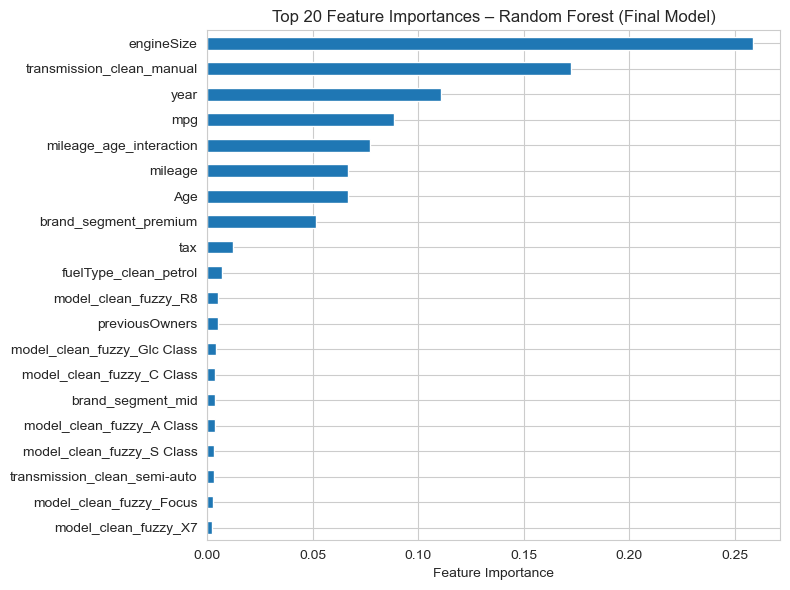

In [135]:
top_k = 20
top_importances = importances.head(top_k)
plt.figure(figsize=(8, 5))
top_importances.sort_values().plot(kind="barh", figsize=(8, 6))
plt.title("Top 20 Feature Importances – Random Forest (Final Model)")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

<h2 style="color: #00E676;">4.5. Alignment Between Objectives and Results</h2>

The results align with the stated objectives:

- **Deployment fidelity objective:** achieved by building an inference function that applies preprocessing using only training-learned parameters, preventing leakage and ensuring a valid Kaggle submission pipeline.
- **Interpretability objective:** achieved by analyzing prediction behavior (sanity checks on predicted price ranges) and by extracting feature importance to identify the main variables driving the model.

Overall, the open-ended tasks complement the benchmarking stage by demonstrating that the selected model is not only accurate under cross-validation, but also **deployable, reproducible, and interpretable**, consistent with both the Kaggle setting and a real-world pricing automation scenario.

<h1 style="color: #00E676;">5. Deployment </h1>

The final stage of the project consists of deploying the selected and optimized model to generate predictions for the Kaggle test dataset and produce a valid submission file.

The test data is processed using the **exact preprocessing pipeline** learned during training, including feature engineering, imputation, categorical encoding, and feature alignment. No parameters are re-fitted at this stage, ensuring a leakage-free and reproducible inference process consistent with a real-world deployment scenario.

Predicted vehicle prices are then combined with the corresponding `carID` identifiers and exported in the required CSV format. This file is directly compatible with the Kaggle competition submission system.

This step completes the **end-to-end machine learning workflow**, demonstrating not only strong predictive performance but also correct model deployment and operational readiness.

In [133]:
submission = pd.DataFrame({
    "carID": df_test_new["carID"],
    "price": y_test_pred
})
submission.to_csv("submission.csv", index=False)

The final deployed model was evaluated on the Kaggle competition test set. The best public leaderboard score achieved was a **Mean Absolute Error (MAE) of 1323.77873**.